In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
import networkx as nx
import matplotlib.pyplot as plt
from topic_modelling import get_topics
import time
from oops import actionTaken, getViolations, getViolators

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anjaneyatripathi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [4]:
def identify_crime(text, types, folders):
    text = text.lower()
    data = []
    for i in range(len(types)):
        if(text.find(types[i]) != -1):
            data.append(folders[i])
    return data

In [5]:
df = pd.read_csv('data.csv')

df.Text = df.Text.apply(lambda x : x.replace('\\n', '\n'))
df.Text = df.Text.apply(lambda x : x.replace('\\t', '\t'))

types = ['insider', 'misappropriate', 'unregister', 'fraud']
folders = ['Insider Trading', 'Misappropriated Funds', 'Unregistered', 'Fraud']
crimes = []
actions = []
violations = []
violators = []

for i in range(len(df['Text'])):
    text = df['Text'][i]
    crimes.append(identify_crime(text, types, folders))
    action = actionTaken(text)
    violation = getViolations(text)
    violator = getViolators(text)
    violations.append(violation)
    violators.append(violator)
    actions.append(action)

df['Crimes'] = crimes
df['Violations'] = violations
df['Violators'] = violators
df['Action Taken'] = actions

In [10]:
df.head(21)

Text  \
0   sec charges at&t and three executives with sel...   
1   u.s. securities and exchange commission\n\nlit...   
2   u.s. securities and exchange commission\n\nlit...   
3   \t\nu.s. securities and exchange commission\n\...   
4   \t\nu.s. securities and exchange commission\n\...   
5   \t\nu.s. securities and exchange commission\n\...   
6   u.s. securities and exchange commission\n\nlit...   
7   u.s. securities and exchange commission\n\nlit...   
8   \t\nu.s. securities and exchange commission\n\...   
9   u.s. securities and exchange commission\n\nlit...   
10  sec charges utah resident with defrauding inve...   
11  sec charges mining company founders and execut...   
12  sec obtains final judgment against investment ...   
13  sec charges utah company, its principals, and ...   
14  securities and exchange commission\n\nsec char...   
15  sec charges former investment adviser for maki...   
16  sec charges ceo of microcap company with fraud...   
17  sec charges investment adviser with fraud\n\nl...   
18  sec obtains final judgment against investment ...   
19    sec v. kenneth a. dachman, scott a. wolf and...   
20  kerry l. hoffman, no. 19-cv-4409 (n.d. iii. fi...   

                                          Crimes  \
0                                             []   
1                       [Insider Trading, Fraud]   
2                              [Insider Trading]   
3                              [Insider Trading]   
4                              [Insider Trading]   
5       [Insider Trading, Misappropriated Funds]   
6                              [Insider Trading]   
7                       [Insider Trading, Fraud]   
8                              [Insider Trading]   
9                              [Insider Trading]   
10                         [Unregistered, Fraud]   
11                [Misappropriated Funds, Fraud]   
12                [Misappropriated Funds, Fraud]   
13  [Misappropriated Funds, Unregistered, Fraud]   
14                [Misappropriated Funds, Fraud]   
15                [Misappropriated Funds, Fraud]   
16  [Misappropriated Funds, Unregistered, Fraud]   
17                [Misappropriated Funds, Fraud]   
18                [Misappropriated Funds, Fraud]   
19  [Misappropriated Funds, Unregistered, Fraud]   
20                         [Unregistered, Fraud]   

                                           Violations  \
0   [violations of the disclosure provisions of Se...   
1   [violating Section 10(b) of the securities exc...   
2   [violating Sections 10(b) and 14(e) of the sec...   
3   [violated Sections 10(b) and 14(e) of the secu...   
4   [violations of Section 10(b) of the securities...   
5   [violating Section 10(b) of the securities exc...   
6   [violating Section 10(b) of the securities exc...   
7                                                  []   
8   [violations of Section 10(b) of the securities...   
9   [violations of Section 17(a) of the securities...   
10  [violating the antifraud provisions of Section...   
11  [violating the antifraud provisions of Section...   
12  [violating Sections 206(1) and 206(2) of the i...   
13  [violations of the antifraud provisions of Sec...   
14  [violations of the antifraud provisions of Sec...   
15  [violating the antifraud provisions of Section...   
16  [violations of the antifraud and registration ...   
17  [violating the antifraud provisions of Section...   
18  [violating the antifraud provisions of Section...   
19  [violated Sections 5(a), 5(c) and 17(a) of the...   
20  [violations of the antifraud provisions of Sec...   

                                            Violators  \
0                                [at&t, inc., et al.]   
1   [mitchel s. guttenberg, erik r. franklin, davi...   
2                      [dr. bobby v. khan, civil cas]   
3       [matthew h. kluger and garrett d. bauer, cas]   
4                                                  []   
5             [timothy j. mcgee, et al., civil actio

In [7]:
df.Text = df.Text.apply(lambda x : x.replace('\n', '\\n'))
df.Text = df.Text.apply(lambda x : x.replace('\t', '\\t'))

df.to_csv('data.csv', index=False)

In [8]:
def create_graph(final_nodes, cnt):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    if(len(edge)==0 or len(final_nodes)==0):
        return None
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print(G.nodes)
        print(G.edges)
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color='red', node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G, edge_labels

['at&t, inc., et al.', 'violations of the disclosure provisions of section 13(a) of the securities exchange act of 1934 and regulation fd thereunder', 'the complaint seeks permanent injunctive relief and civil monetary penalties against each defendant.']
[('at&t, inc., et al.', 'violations of the disclosure provisions of section 13(a) of the securities exchange act of 1934 and regulation fd thereunder'), ('at&t, inc., et al.', 'the complaint seeks permanent injunctive relief and civil monetary penalties against each defendant.')]

Graph generated
['mitchel s. guttenberg, erik r. franklin, david m. tavdy, mark e. lenowitz, robert d. babcock, andrew a. srebnik, ken okada, david a. glass, marc r. jurman, randi e. collotta, christopher k. collotta, q capital investment partners, lp, dsj international resources ltd. (d/b/a chelsey capital), and jasper capital llc, c.a', 'insider trading', 'fraud', 'violating section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder', 'g

['farzin bazshushtari, united states district court for the central district of california, civil actio', 'insider trading', 'violations of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder', 'bazshushtari agreed to settle the sec’s charges by paying $76,676.50 in disgorgement and a $76,676.50 penalty', 'bazshushtari also has consented without admitting or denying the sec’s allegations to a permanent injunction from further violations of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder.']
[('farzin bazshushtari, united states district court for the central district of california, civil actio', 'insider trading'), ('farzin bazshushtari, united states district court for the central district of california, civil actio', 'violations of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder'), ('farzin bazshushtari, united states district court for the central district of california, civil actio', 'bazshushta

['jacob c. glick, civil actio', 'misappropriated funds', 'fraud', 'violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder', 'nd sections 206(1) and 206(2) of the investment advisers act of 1940', "the complaint further charges glick with aiding and abetting apa's books and records violations under section 204(a) of the advisers act and rule 204-2(a)(7) thereunder", 'the sec seeks permanent injunctions, disgorgement, and civil penalties against glick.']
[('jacob c. glick, civil actio', 'misappropriated funds'), ('jacob c. glick, civil actio', 'fraud'), ('jacob c. glick, civil actio', 'violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder'), ('jacob c. glick, civil actio', 'nd sections 206(1) and 206(2) of the investment advisers act of 1940'), ('jacob c. glick, civil actio', "the complaint further charges glick with aiding and abetting apa's books and records viol

['william andrew stack, esq.', 'misappropriated funds', 'unregistered', 'fraud', 'violations of the antifraud and registration provisions of sections 5(a), 5(c), and 17(a) of the securities act of 1933,', 'section 10(b) of the securities exchange act of 1934 and rule 10b-5(b) thereunder', "the sec seeks a permanent injunction from violating the charged provisions, disgorgement, civil penalties, a conduct-based injunction enjoining stack from providing legal services to anyone in connection with a securities offering pursuant to an exemption from the securities laws' registration requirements, a penny stock bar, and an officer and director bar."]
[('william andrew stack, esq.', 'misappropriated funds'), ('william andrew stack, esq.', 'unregistered'), ('william andrew stack, esq.', 'fraud'), ('william andrew stack, esq.', 'violations of the antifraud and registration provisions of sections 5(a), 5(c), and 17(a) of the securities act of 1933,'), ('william andrew stack, esq.', 'section 10(

['first resource group llc, and david h. stern, civil actio', 'unregistered', 'fraud', 'violations of section 17(a) of the securities act of 1933,', 'sections 10(b) and 15(a) of the securities exchange act of 1934 and rule 10b-5 thereunder', 'in its complaint, the commission seeks permanent injunctions, disgorgement plus prejudgment interest, and civil penalties against the defendants, and a penny stock bar against stern.']
[('first resource group llc, and david h. stern, civil actio', 'unregistered'), ('first resource group llc, and david h. stern, civil actio', 'fraud'), ('first resource group llc, and david h. stern, civil actio', 'violations of section 17(a) of the securities act of 1933,'), ('first resource group llc, and david h. stern, civil actio', 'sections 10(b) and 15(a) of the securities exchange act of 1934 and rule 10b-5 thereunder'), ('first resource group llc, and david h. stern, civil actio', 'in its complaint, the commission seeks permanent injunctions, disgorgement p

<ipython-input-8-87c168fb1352>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(size,size))


['brenda a. eschbach', 'misappropriated funds', 'unregistered', 'fraud', 'violated section 17(a) of the securities act of 1933(securities act),', 'sections 10(b) and 15(a)(1) of the securities exchange act of 1934 (exchange act), exchange act rule 10b-5,', 'sections 206(1) and 206(2) of the investment advisers act of 1940 (advisers act) and seeks a permanent injunction against future violations of those provisions, disgorgement of her ill-gotten gains, with prejudgment interest thereon, and a civil money penalty', 'the complaint alleges that eschbach began to misappropriate client funds while operating a franchise of a large investment adviser and broker-dealer and that the theft of client funds continued after eschbach founded aventine investment services, inc., a now-defunct california corporationthe complaint further alleges that eschbach did not make investments as directed by her clients, instead stealing their funds and using them to pay for, among other things, living expenses, 

['first resource group llc, and david h. stern, civil actio', 'unregistered', 'fraud', 'violation of the antifraud provisions of the federal securities lawsaccording to the sec√¢¬ä¬ôs complaint, at various times from december 2008 to may 2010 first resource and stern, and telemarketers they employed, fraudulently solicited brokers to purchase stock in trinitycare senior living, inc', 'cytta corporationthe complaint alleges that while first resource and stern were recommending the purchase of the securities of the two microcap companies, stern sold first resource√¢¬ä¬ôs shares of trinitycare and cytta unbeknownst to the investors who were purchasing the stocks, a practice known as scalpingfurther, the complaint alleges that while stern was selling the stocks, he was also purchasing small amounts of the stocks in order to create the false appearance of legitimate trading activity to induce the investors to purchase shares in both companiesthe sec also alleges that stern and first resourc

['abhi batra a/k/a abhimanyu batra', 'fraud', 'violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder', 'district court in los angeles, charges batra with violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder, and seeks injunctions, civil penalties, and disgorgement with prejudgment interest.']
[('abhi batra a/k/a abhimanyu batra', 'fraud'), ('abhi batra a/k/a abhimanyu batra', 'violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder'), ('abhi batra a/k/a abhimanyu batra', 'district court in los angeles, charges batra with violating the antifraud provisions of section 10(b) of the securities exchange act of 1934 and rule 10b-5 thereunder, and seeks injunctions, civil penalties, and disgorgement with prejudgment interest.')]

Graph generated
['ivan ramos', 'fraud', 'violating the antifraud provisions of 

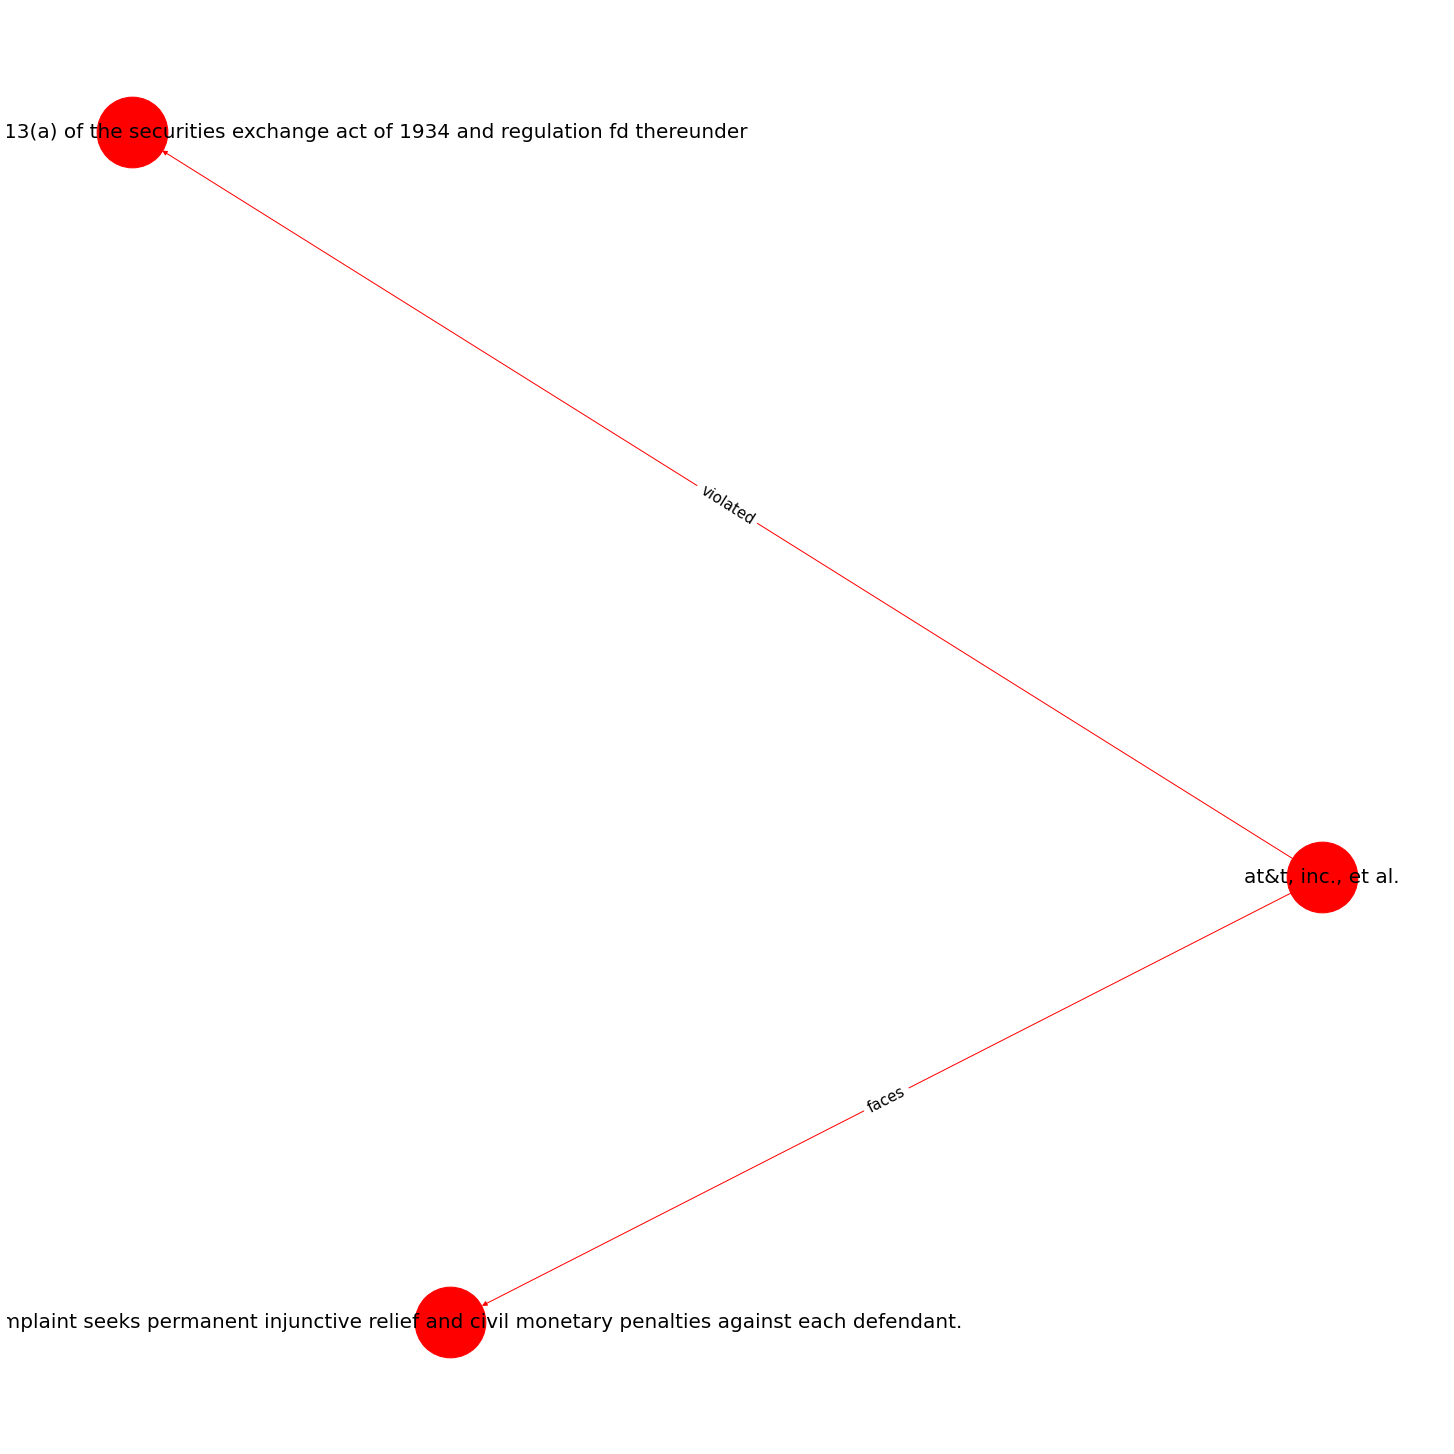

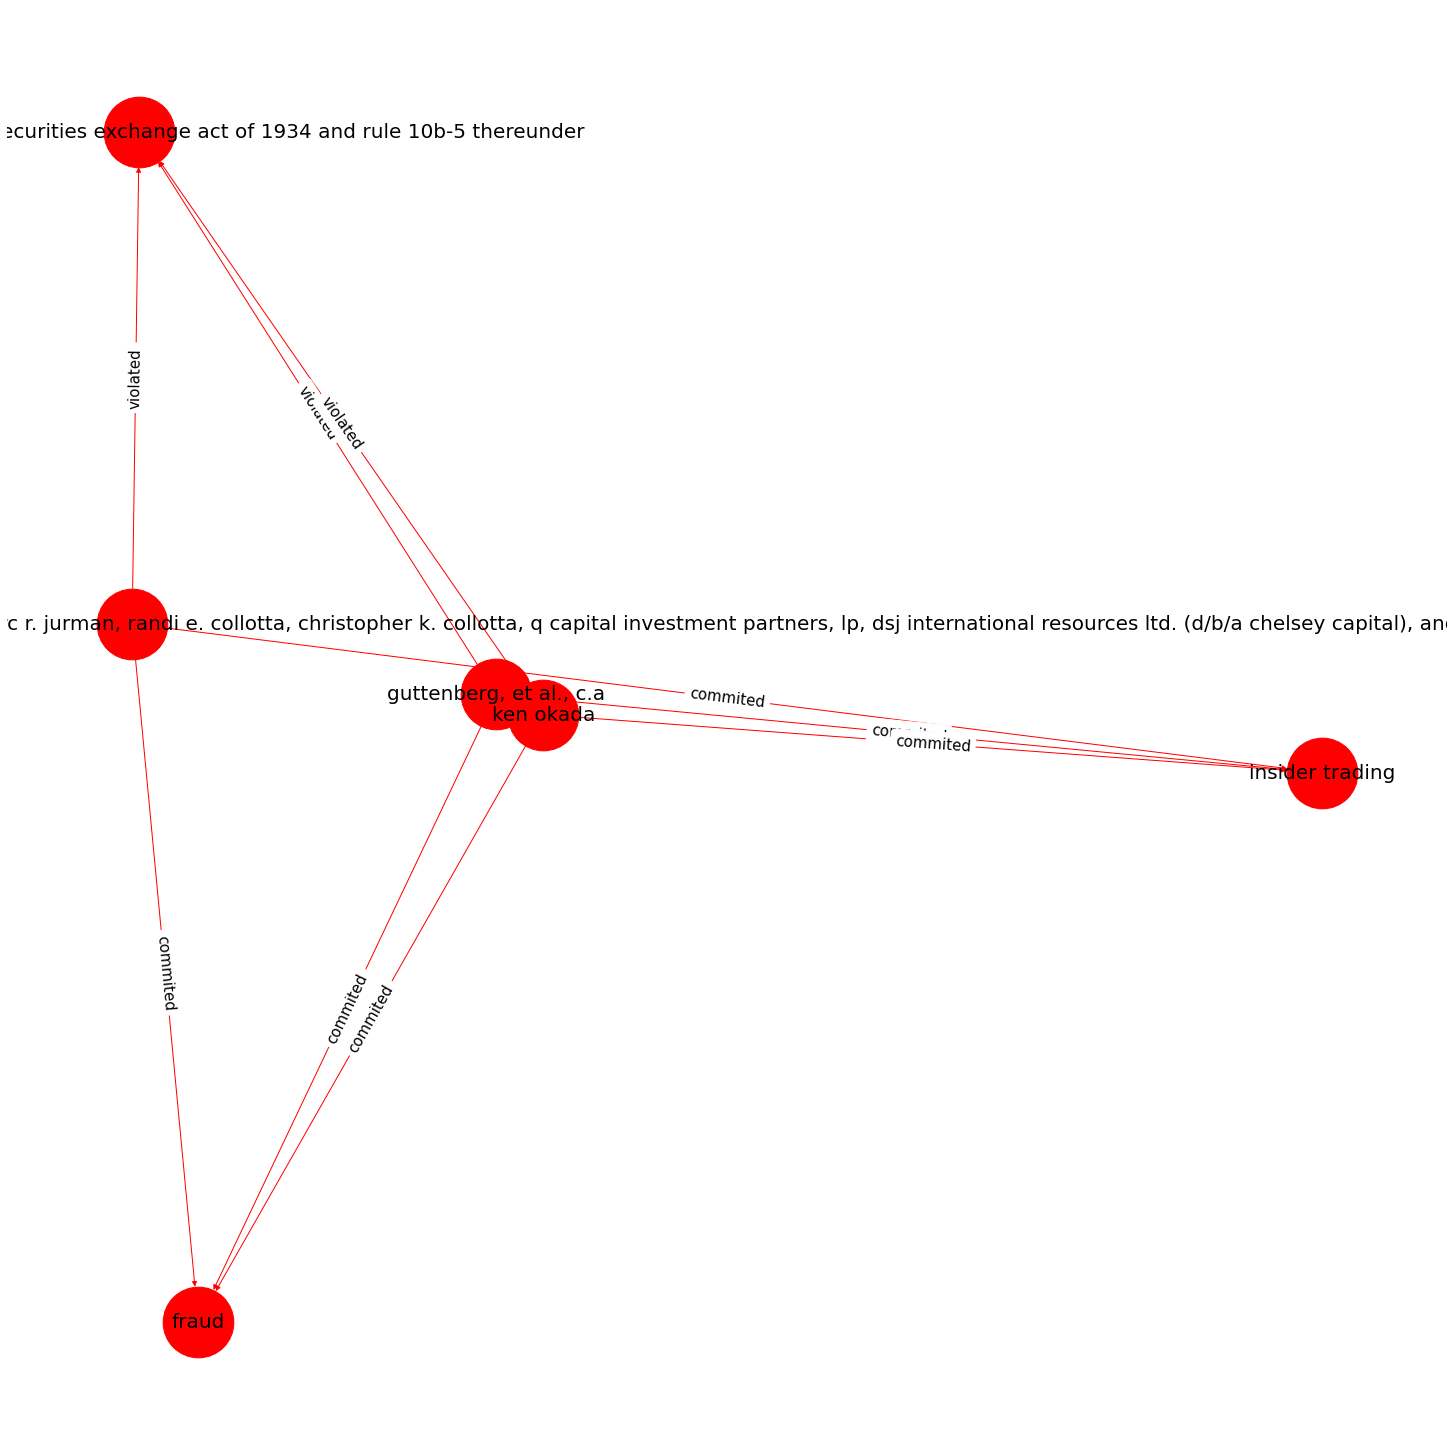

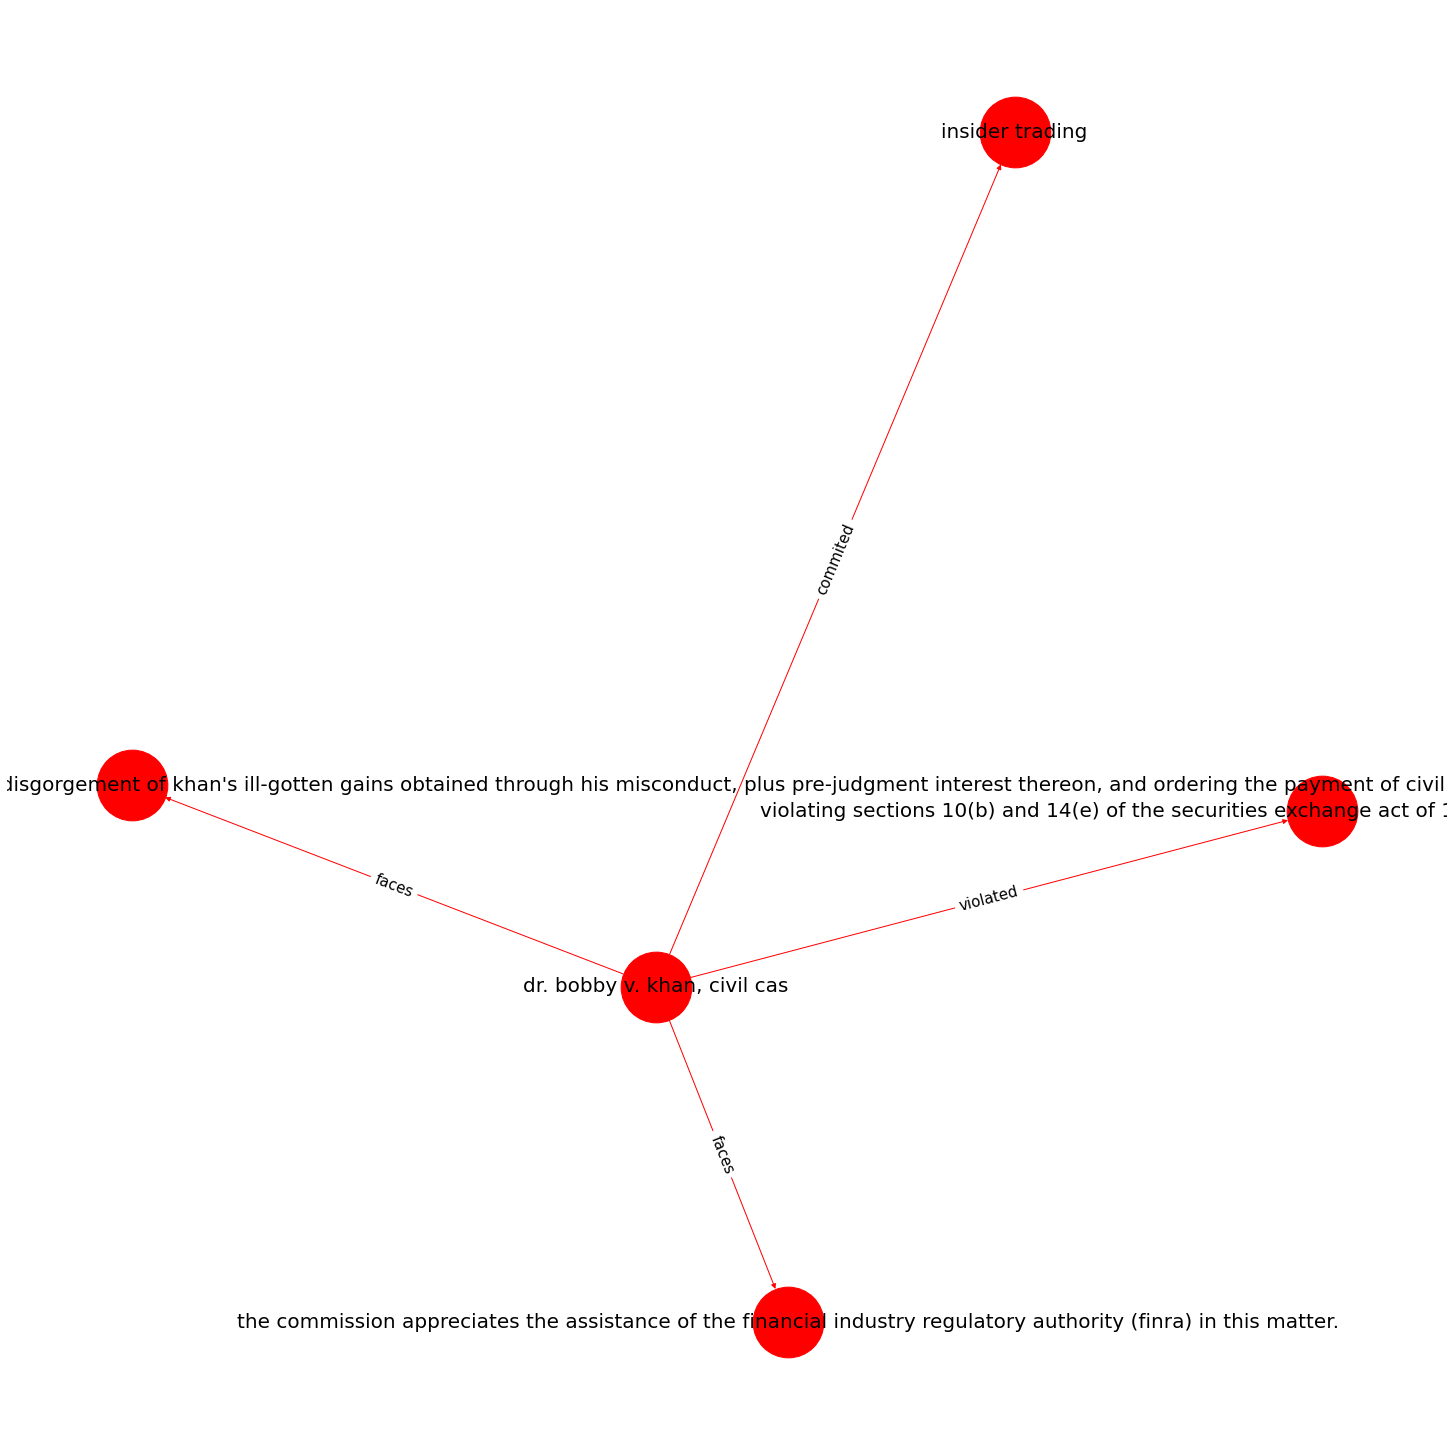

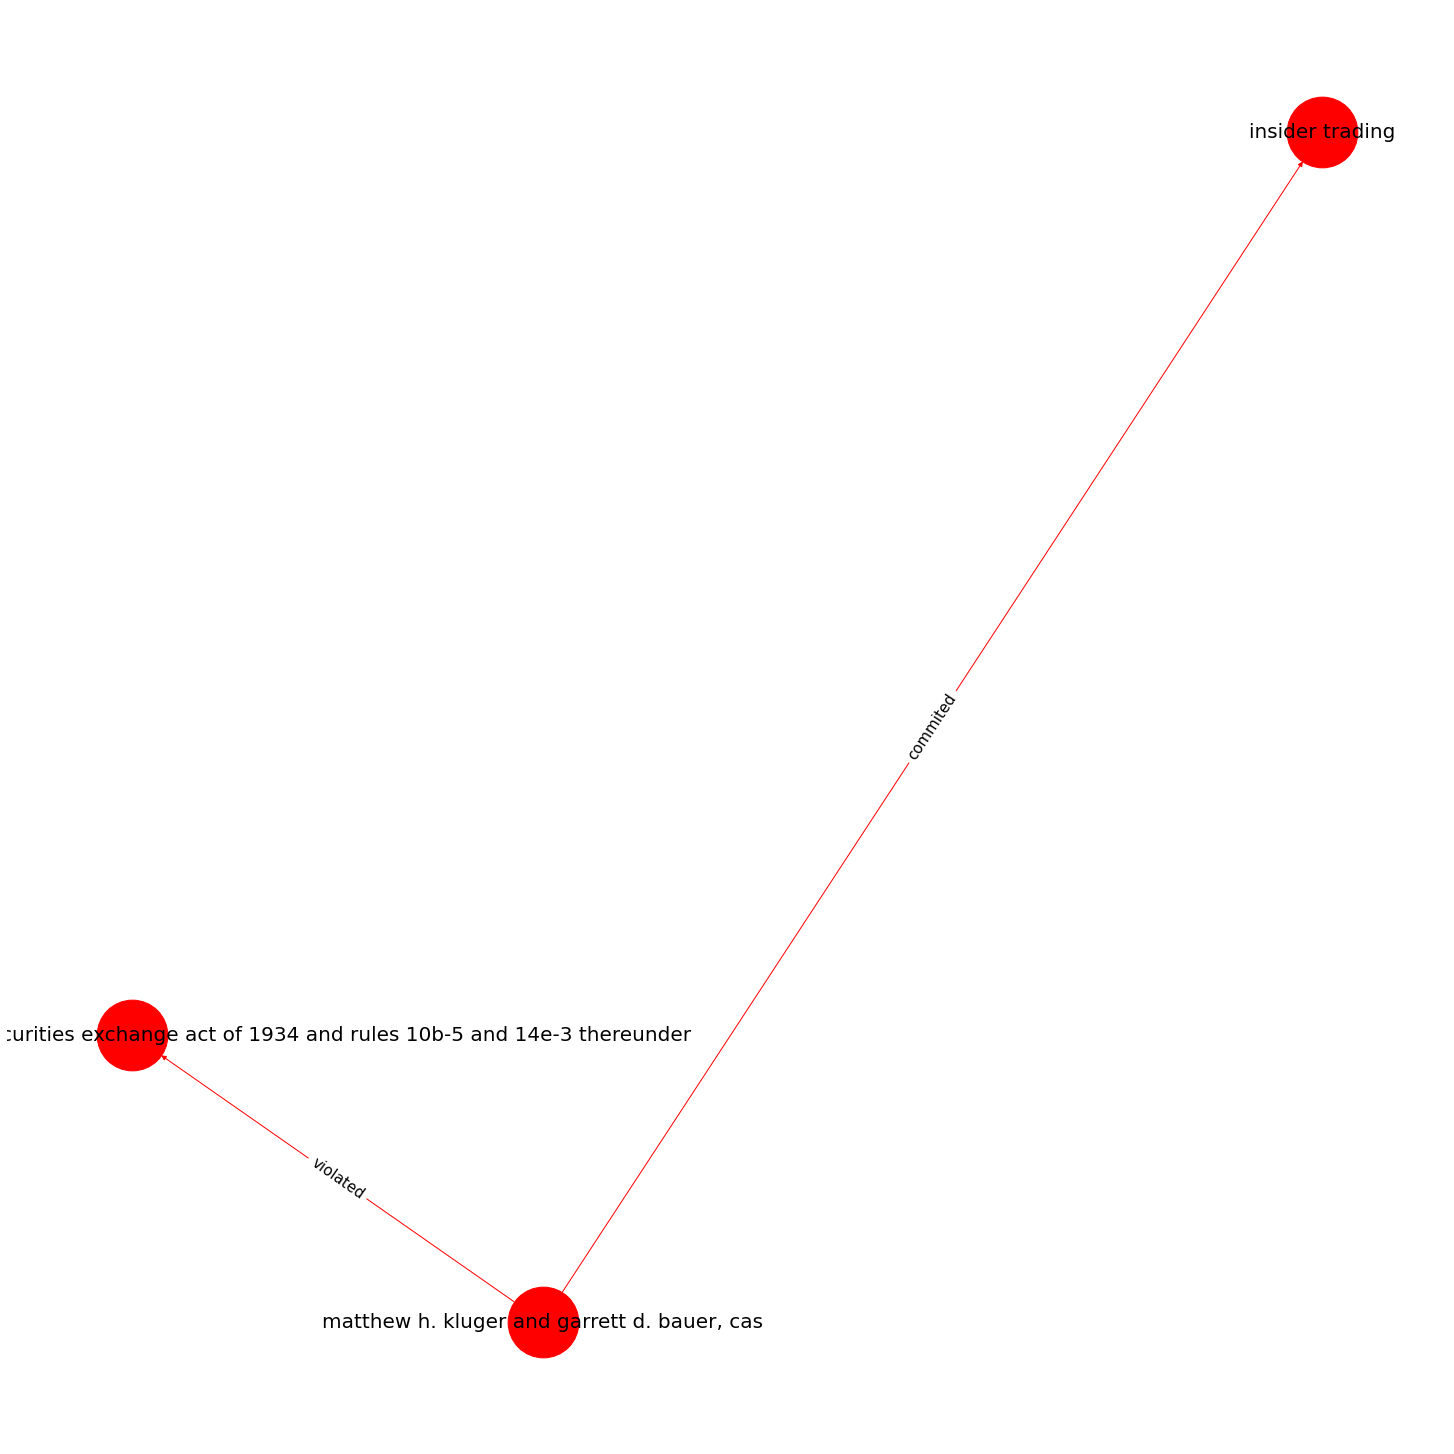

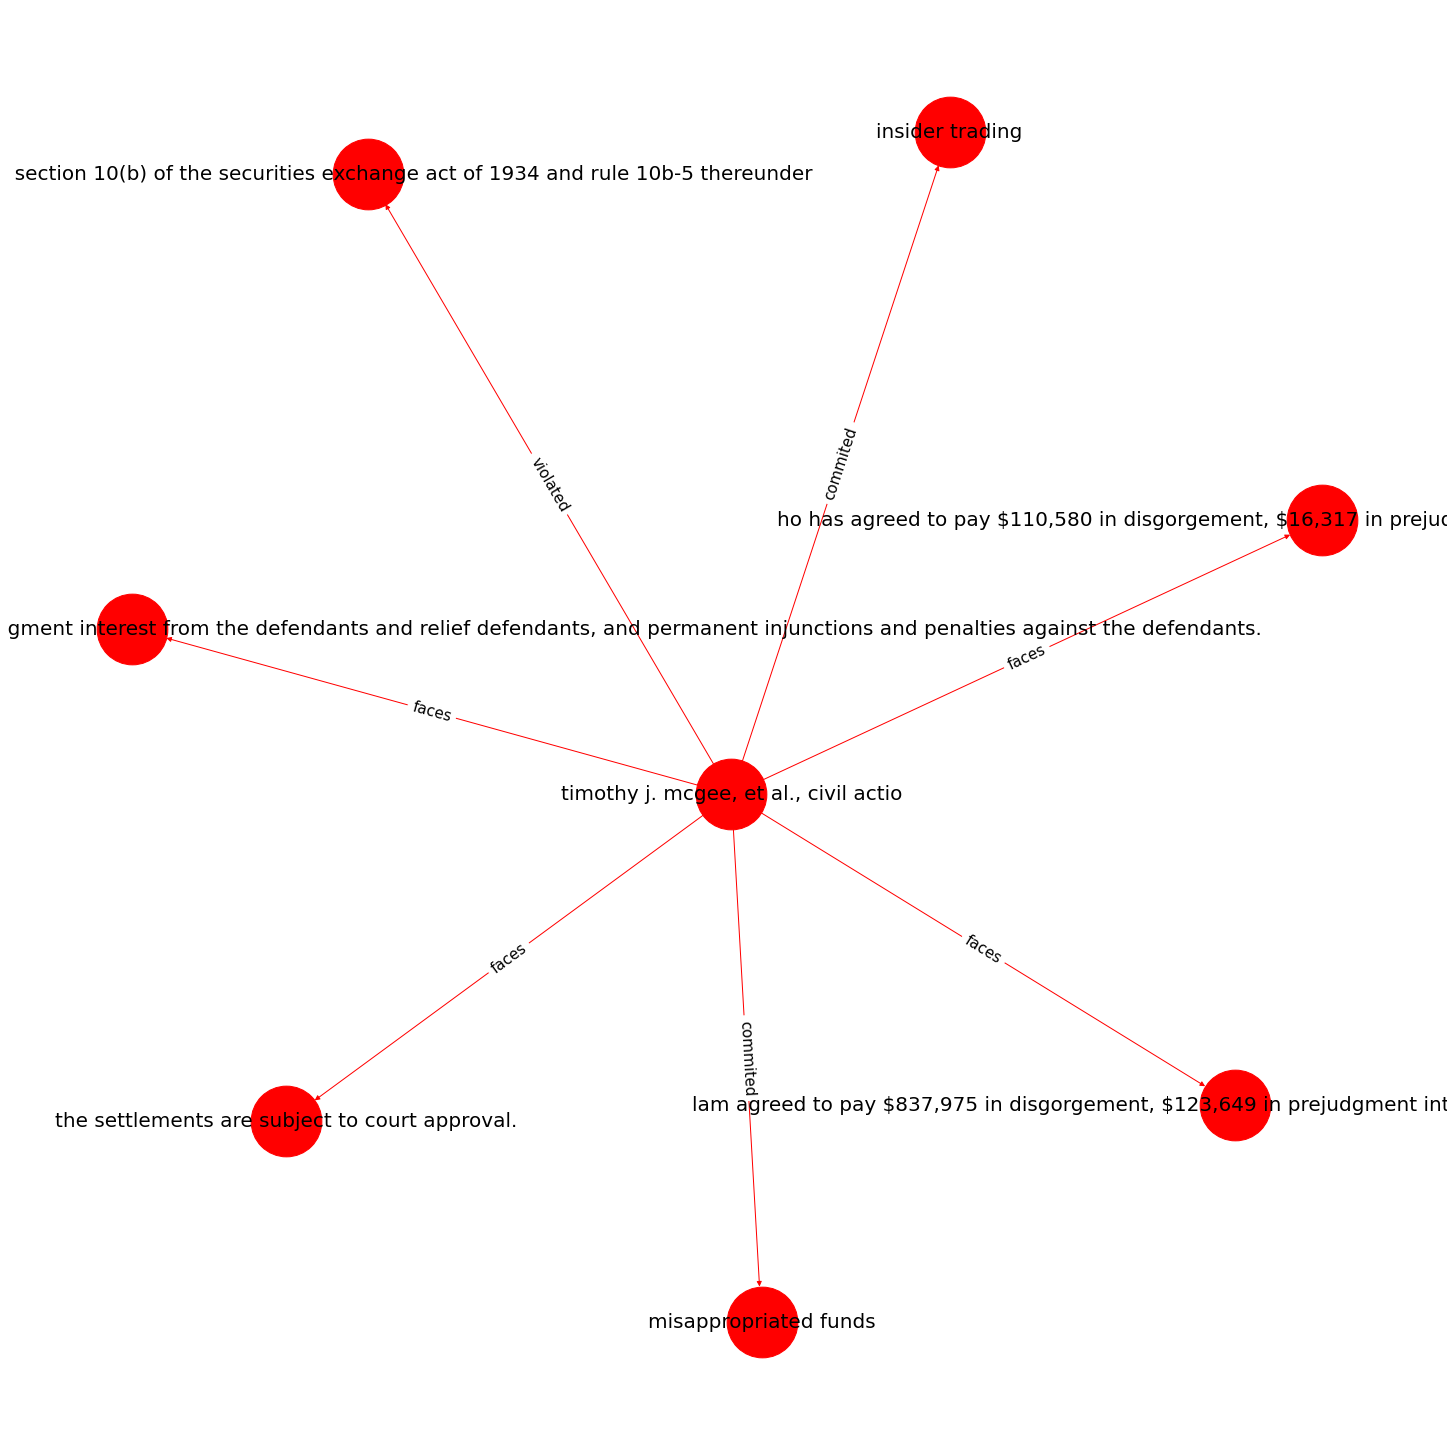

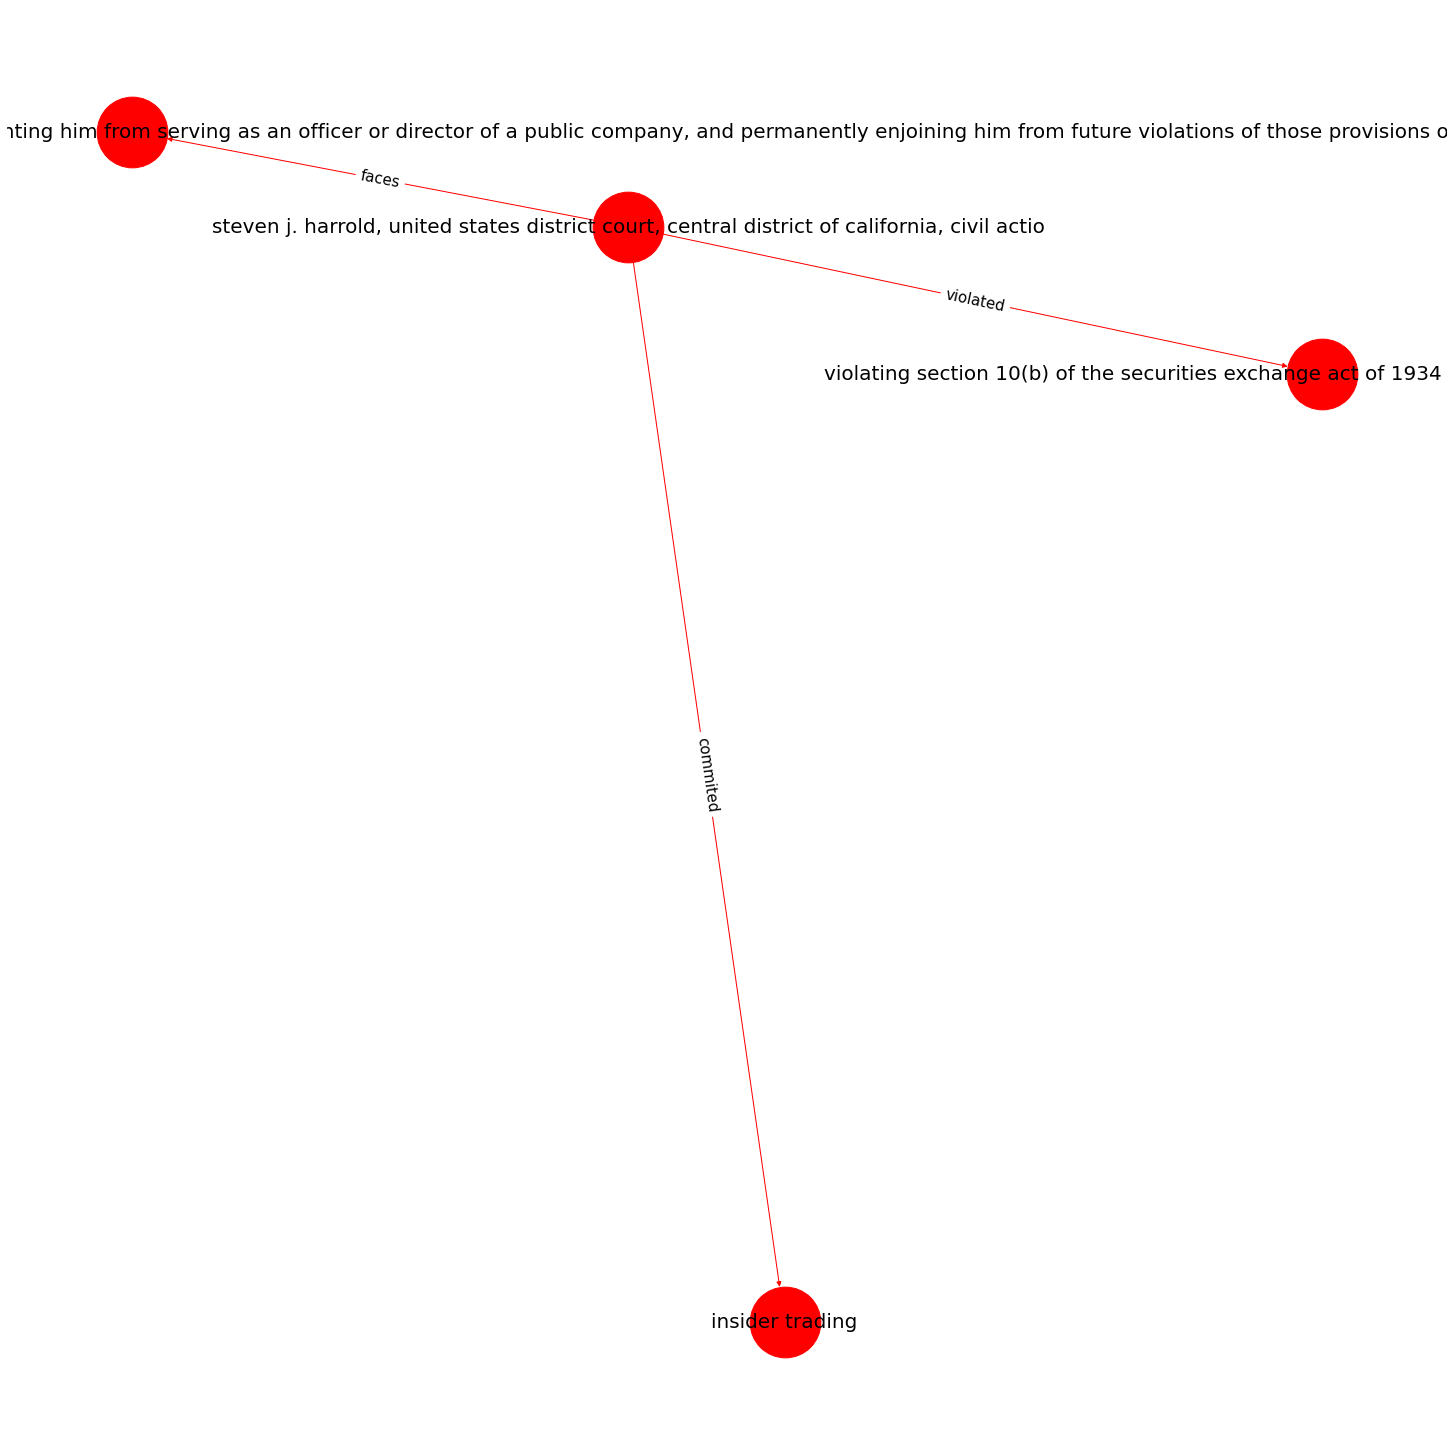

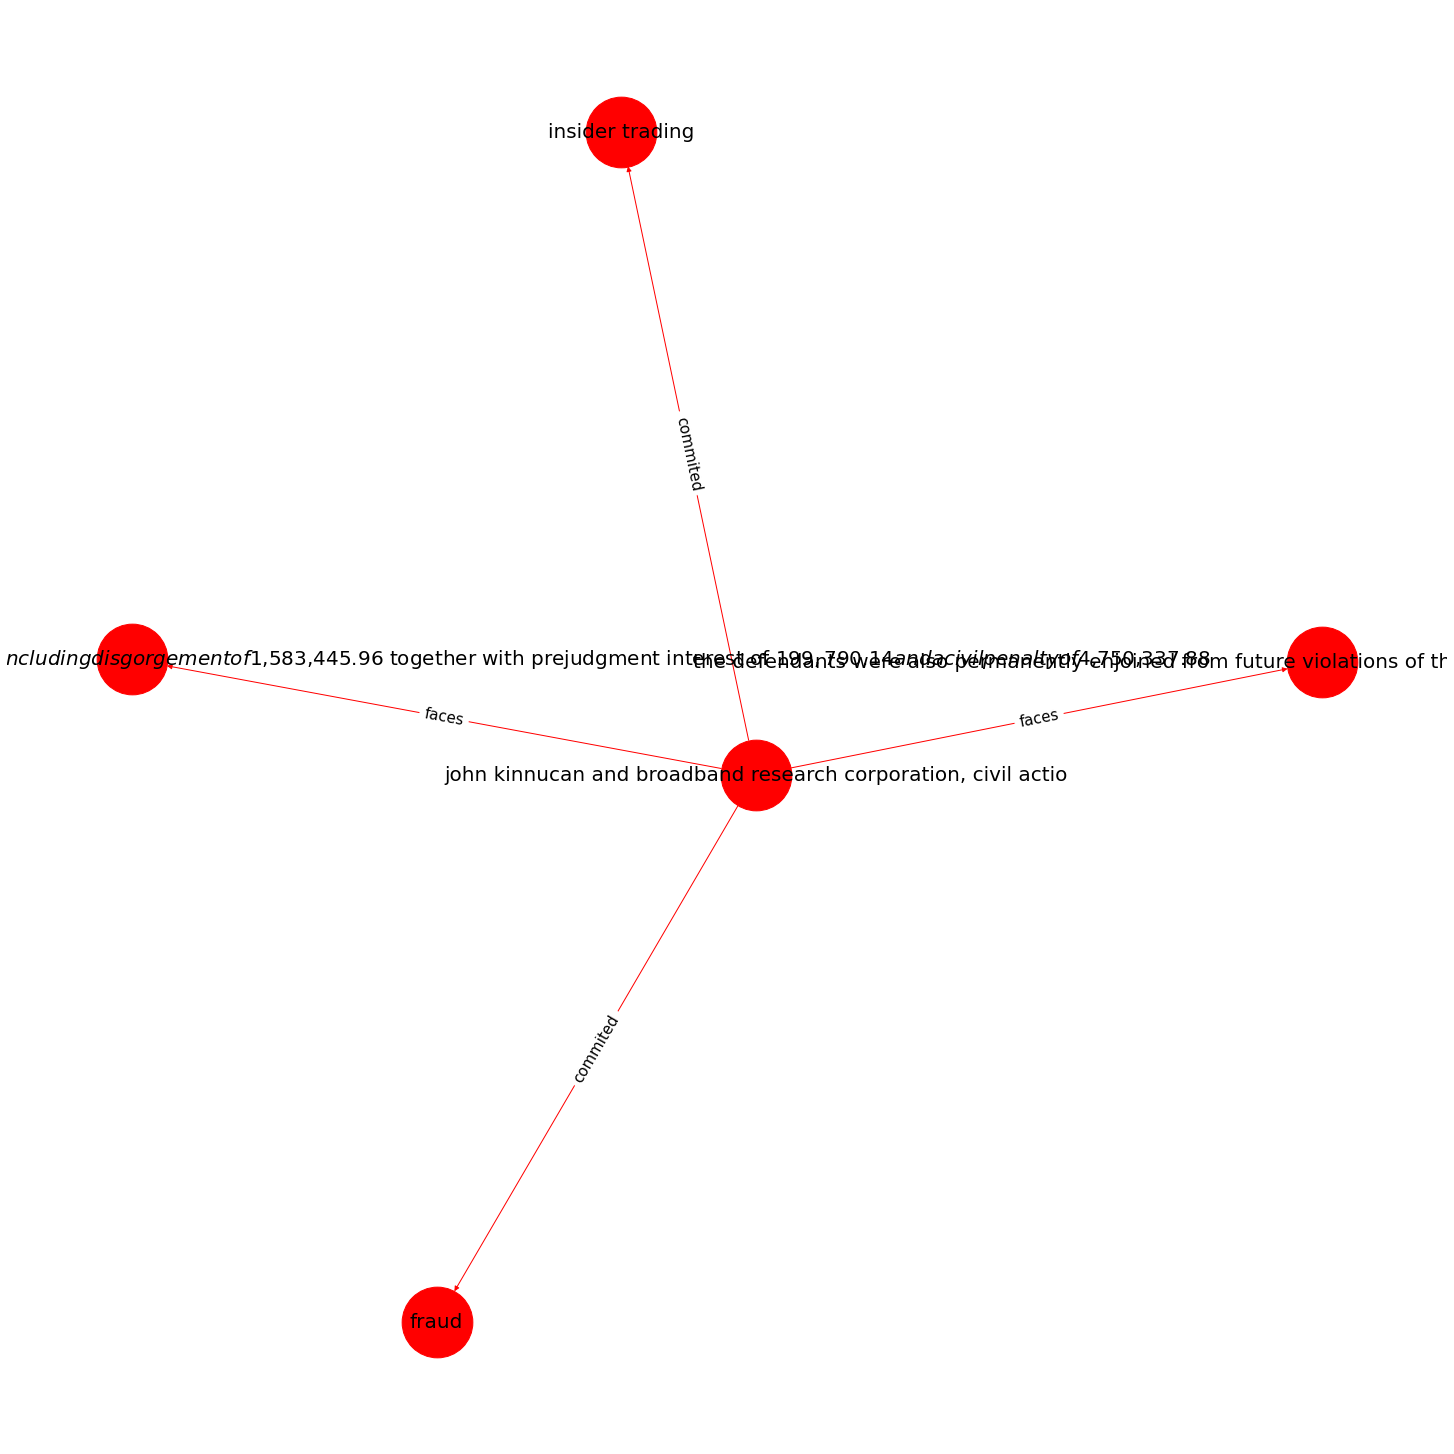

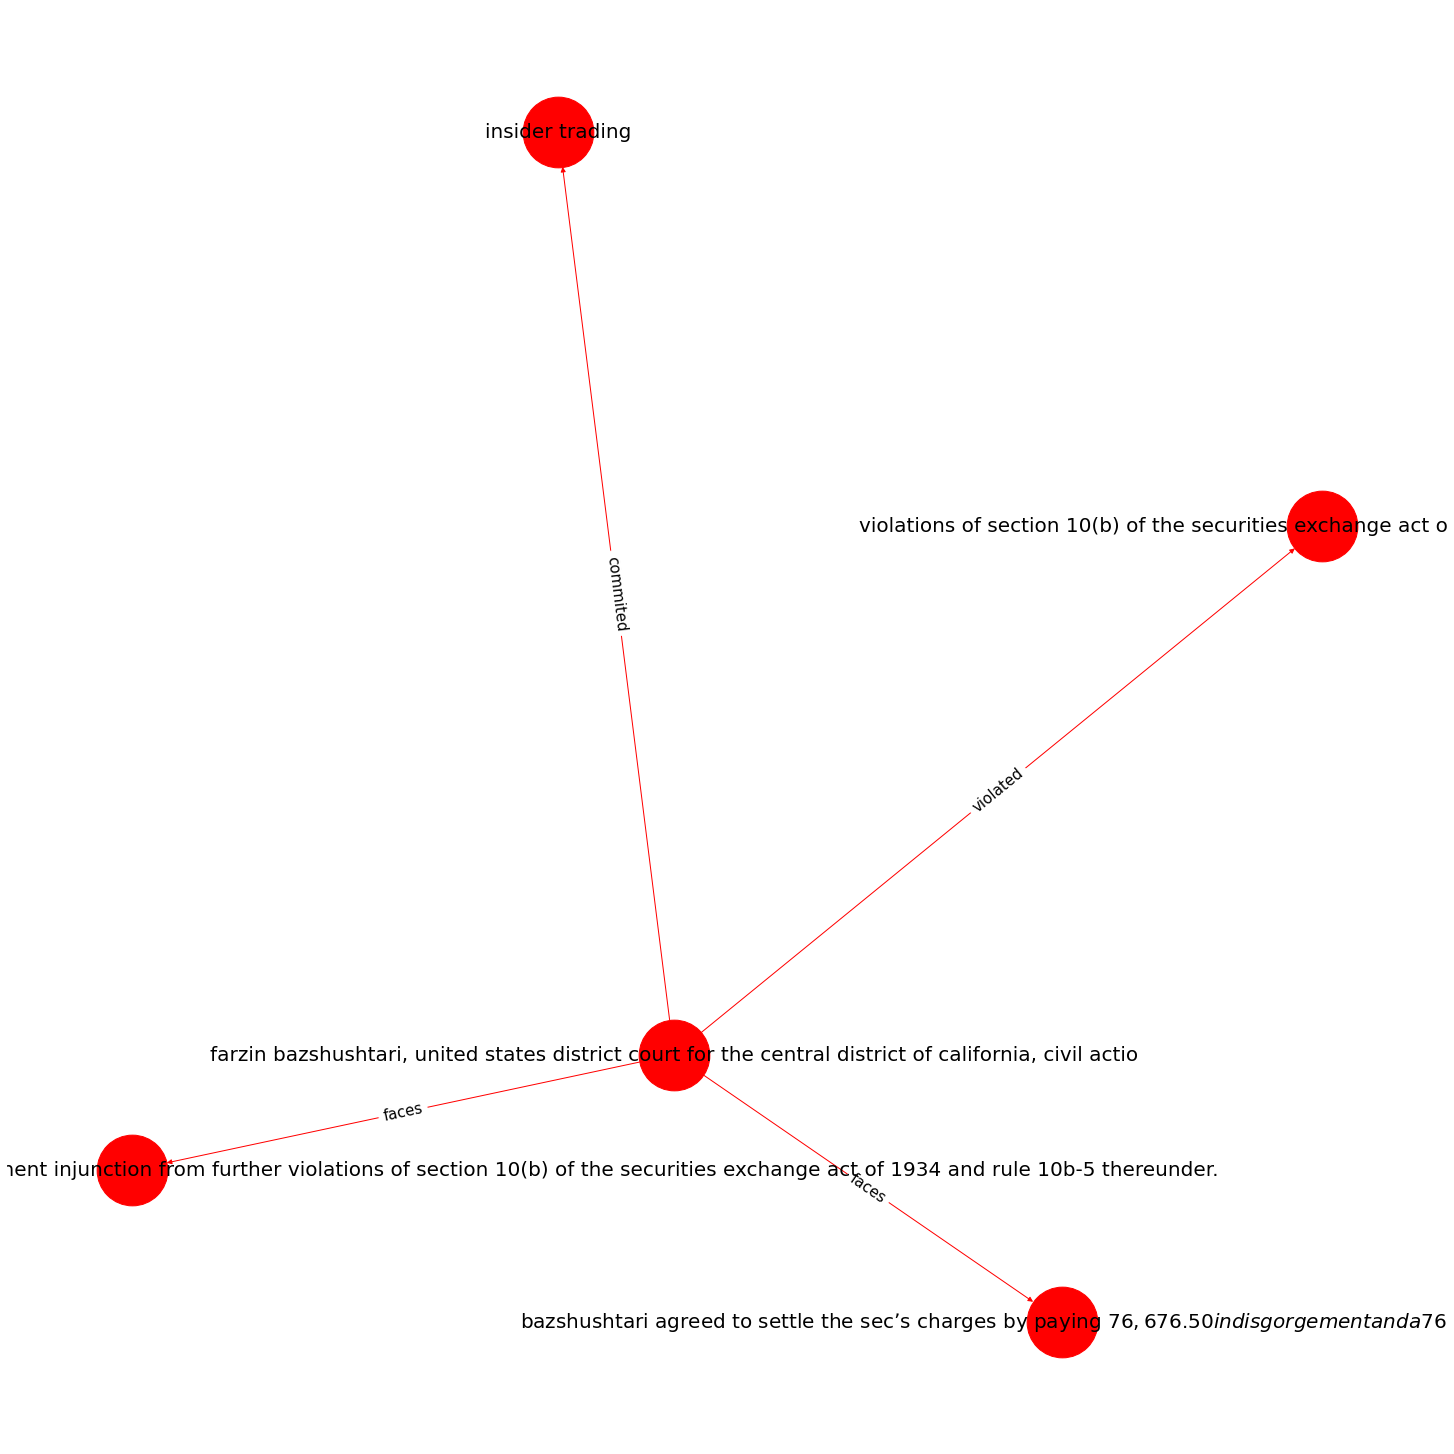

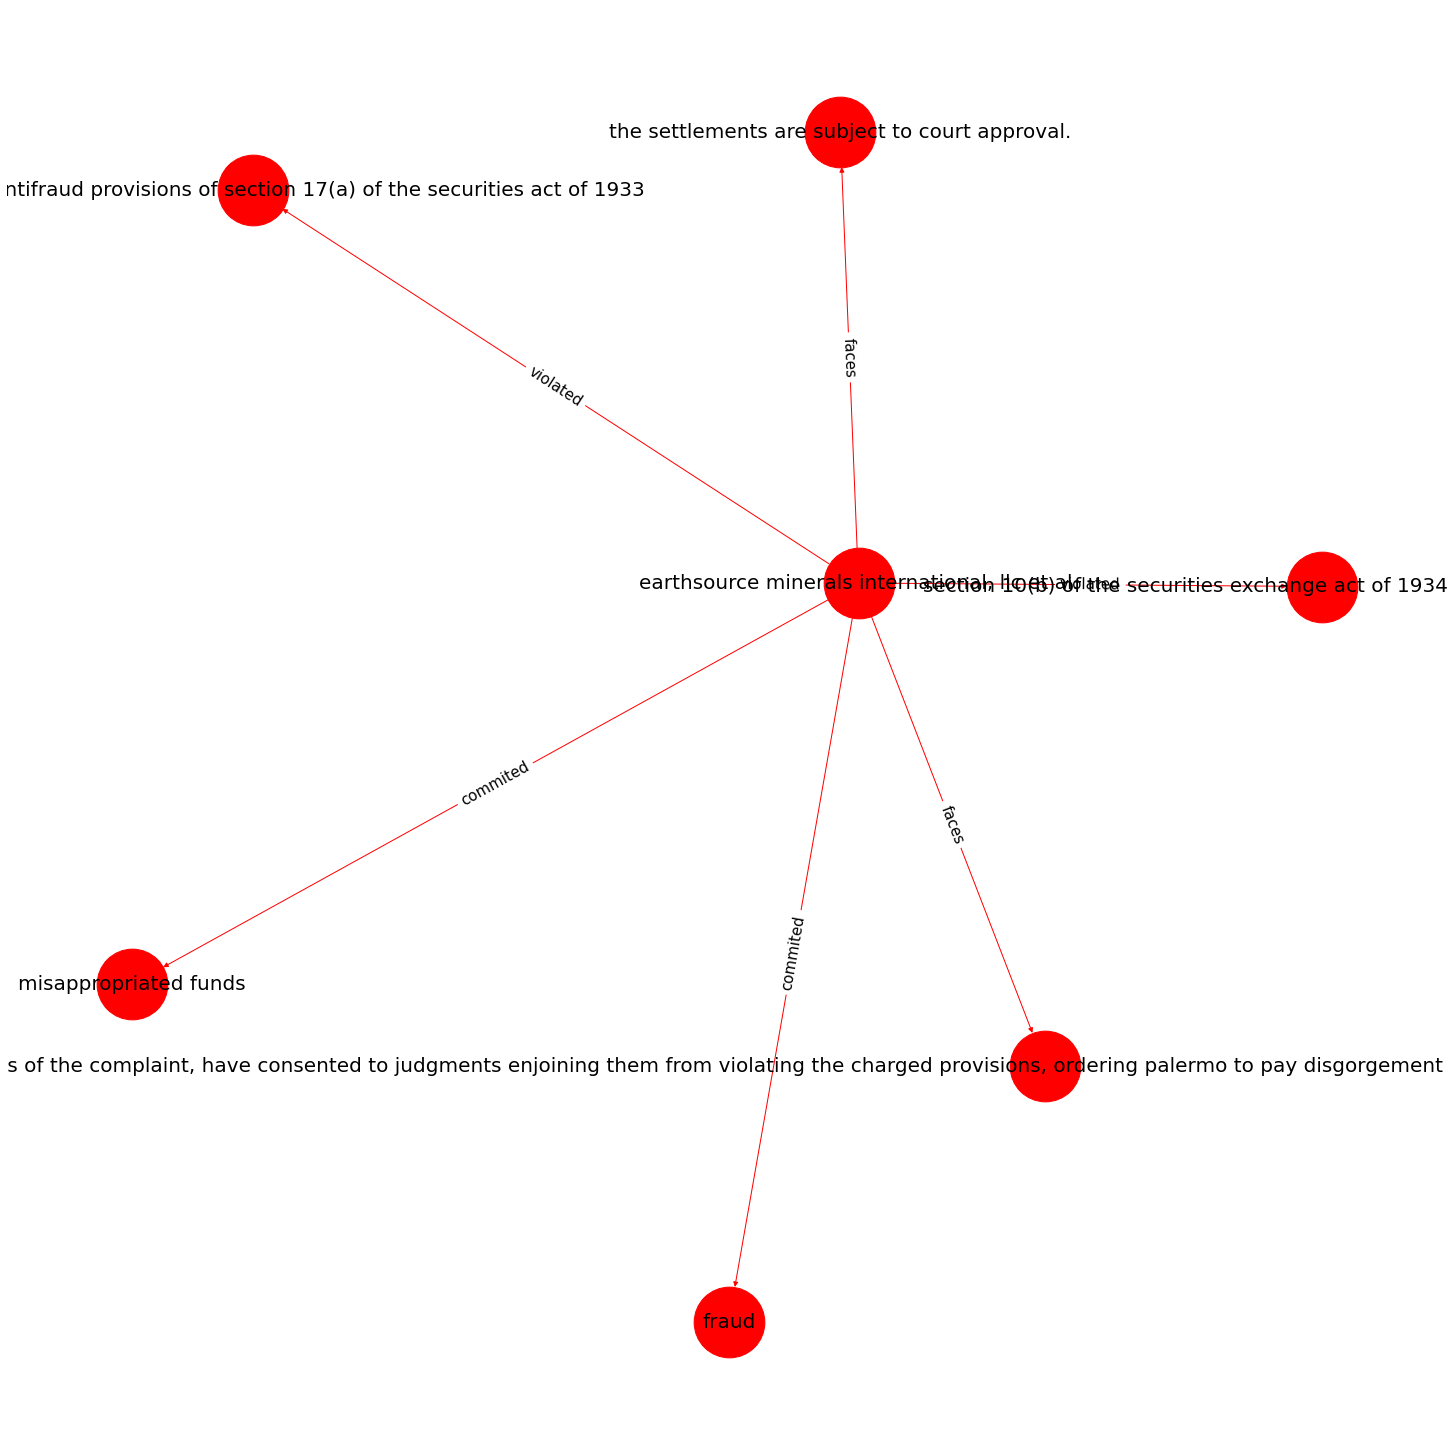

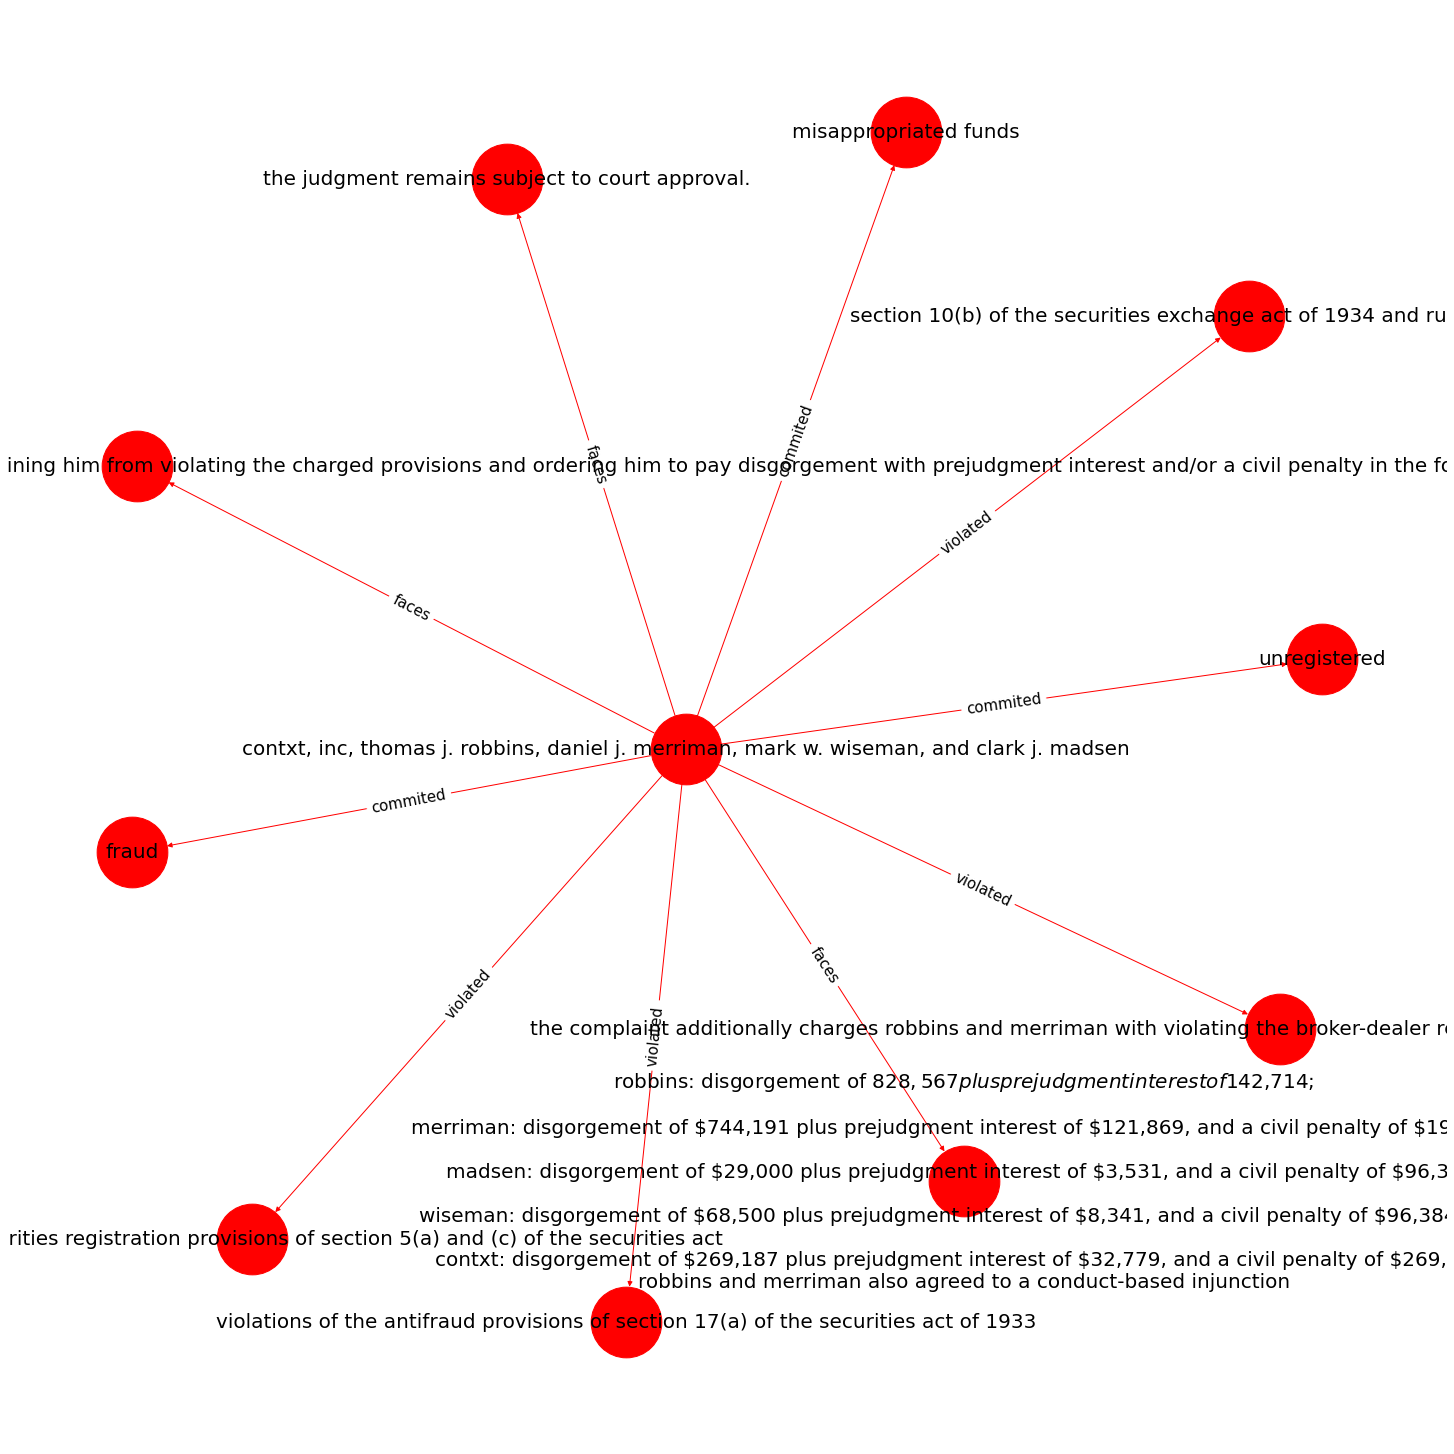

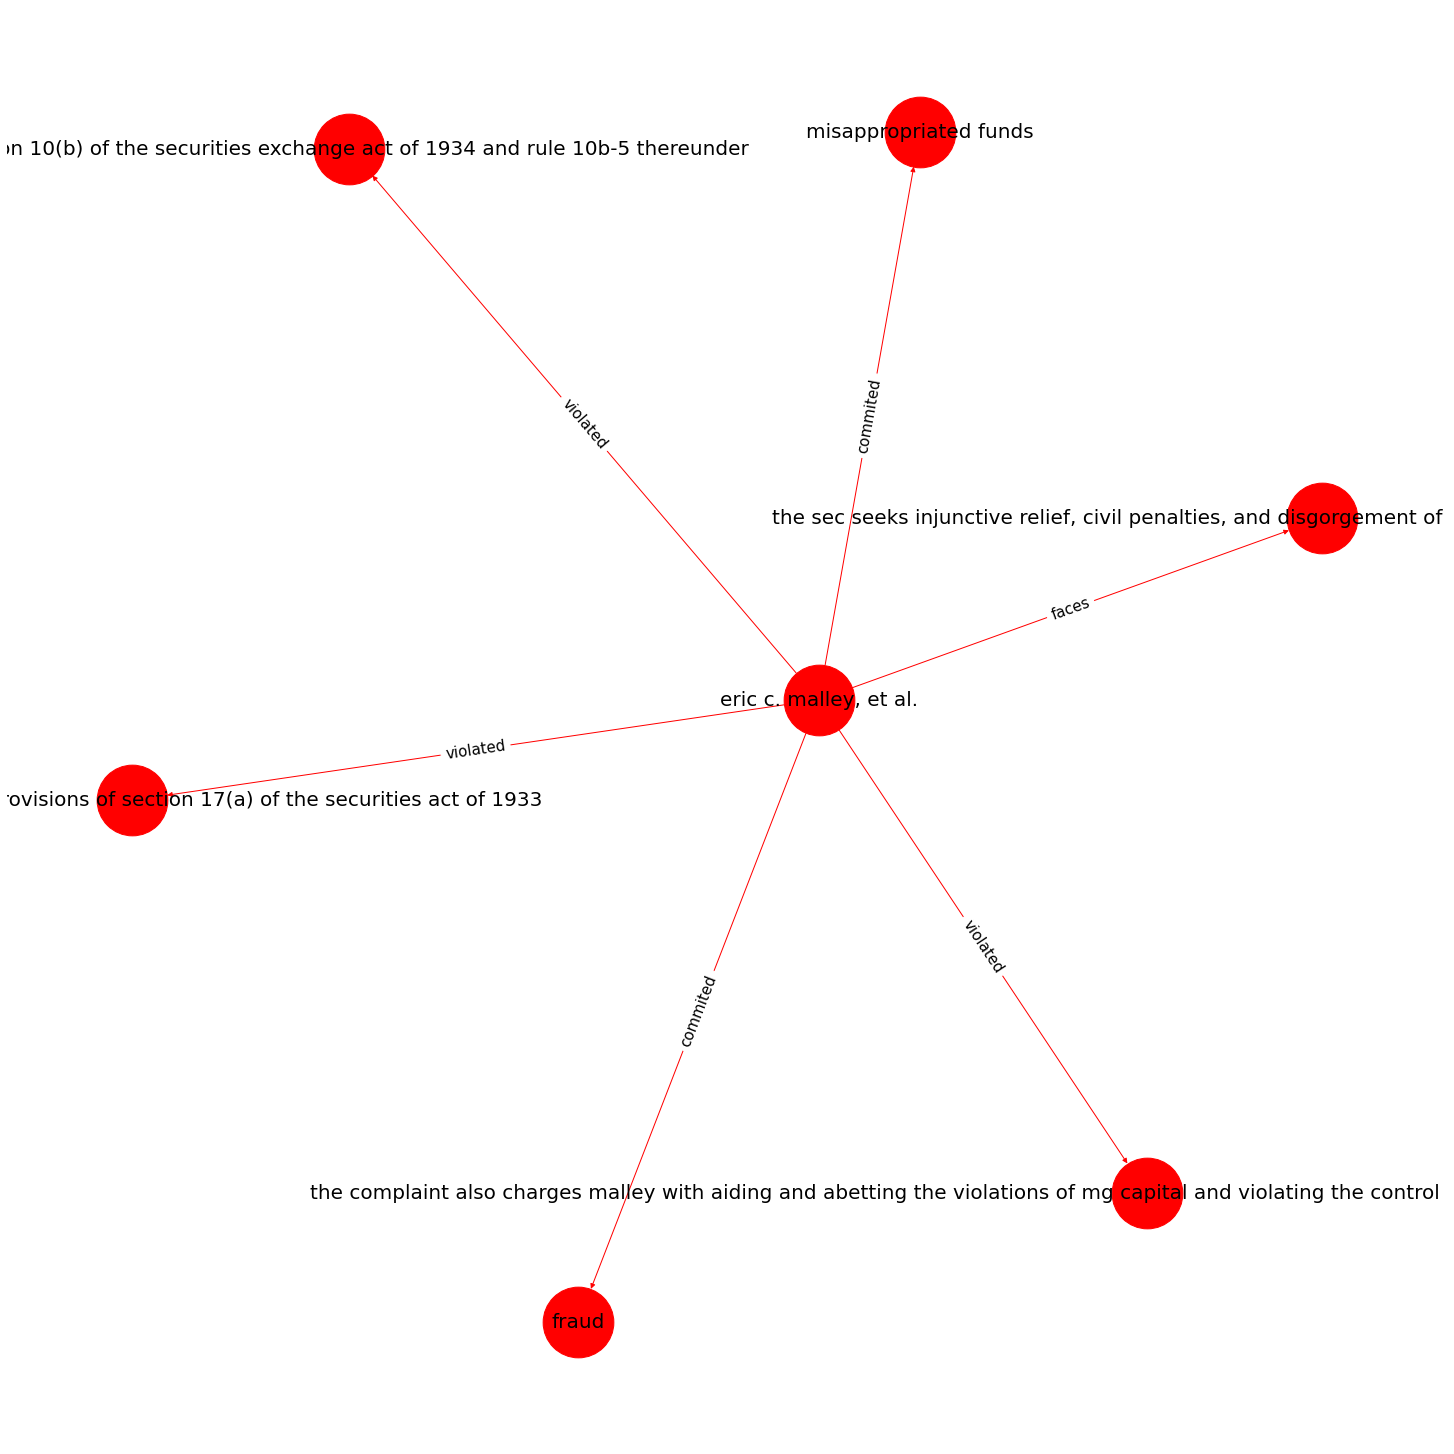

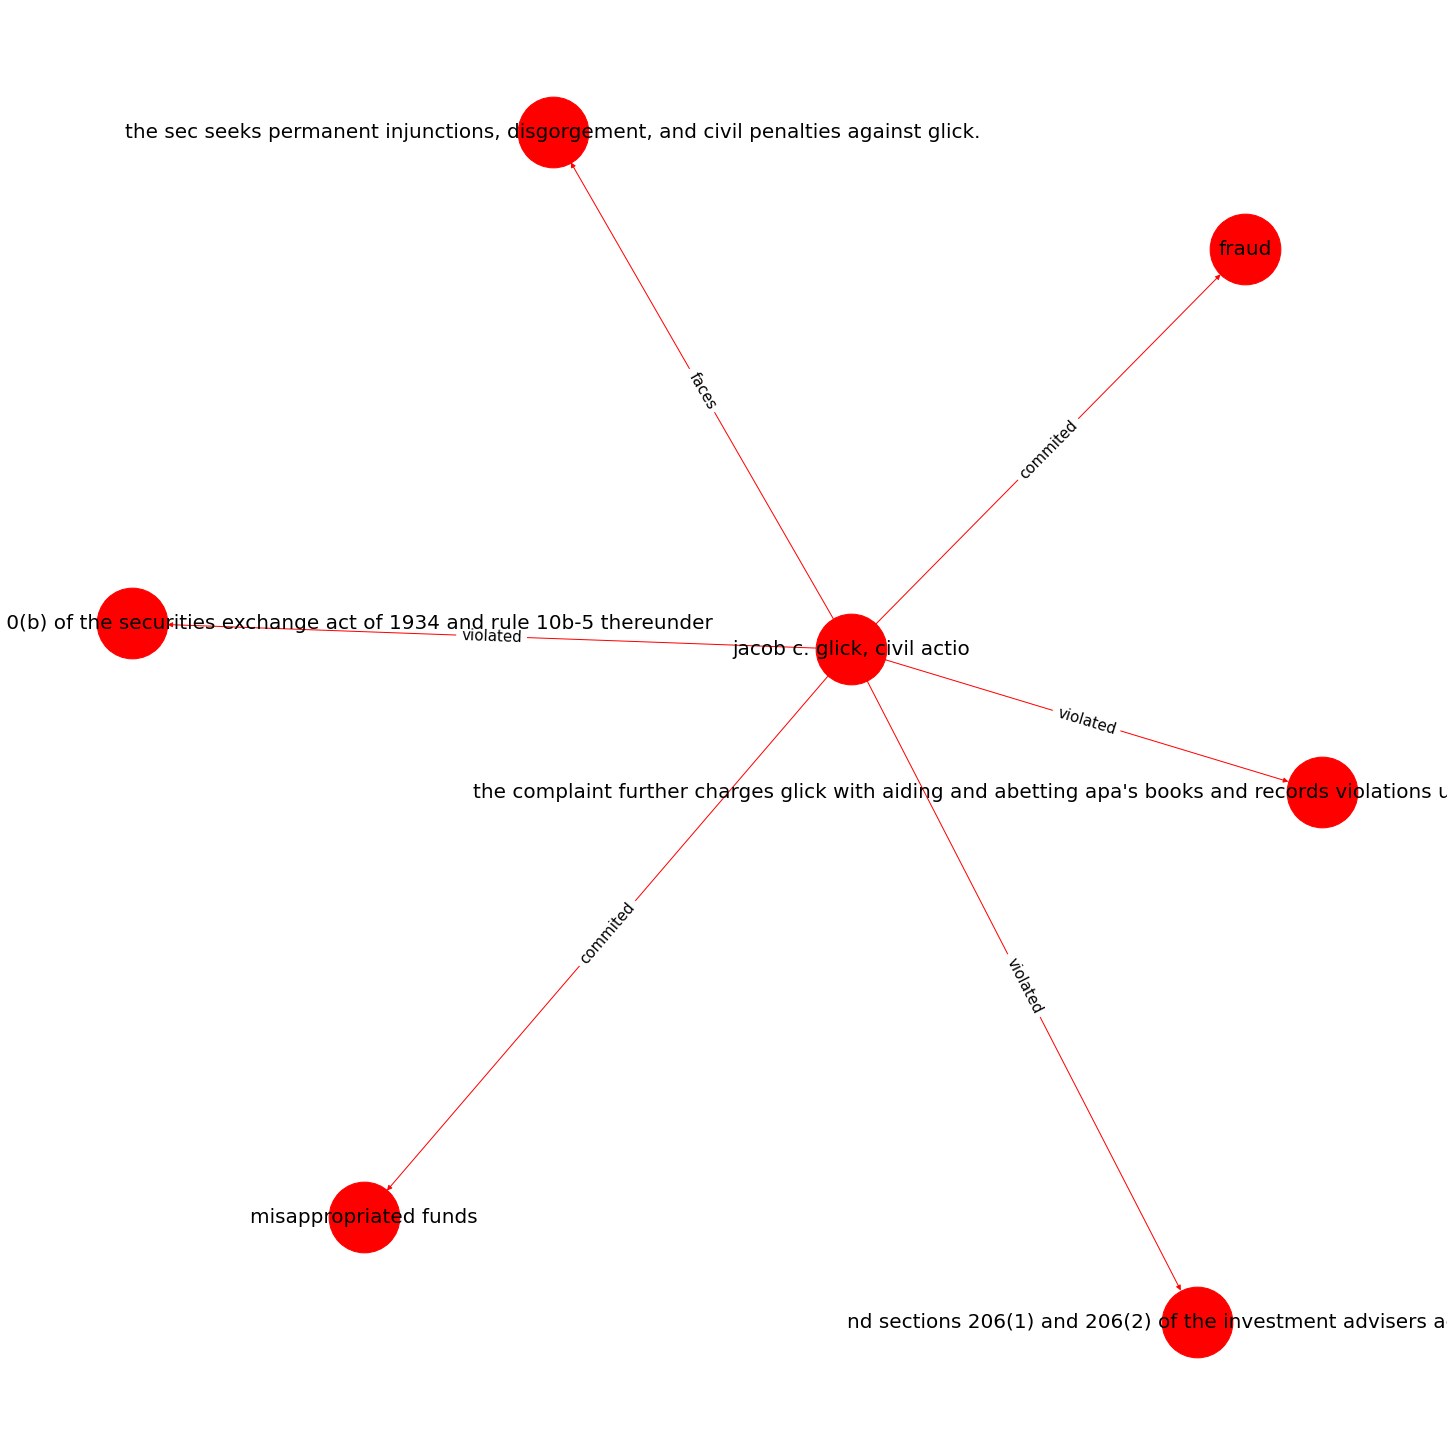

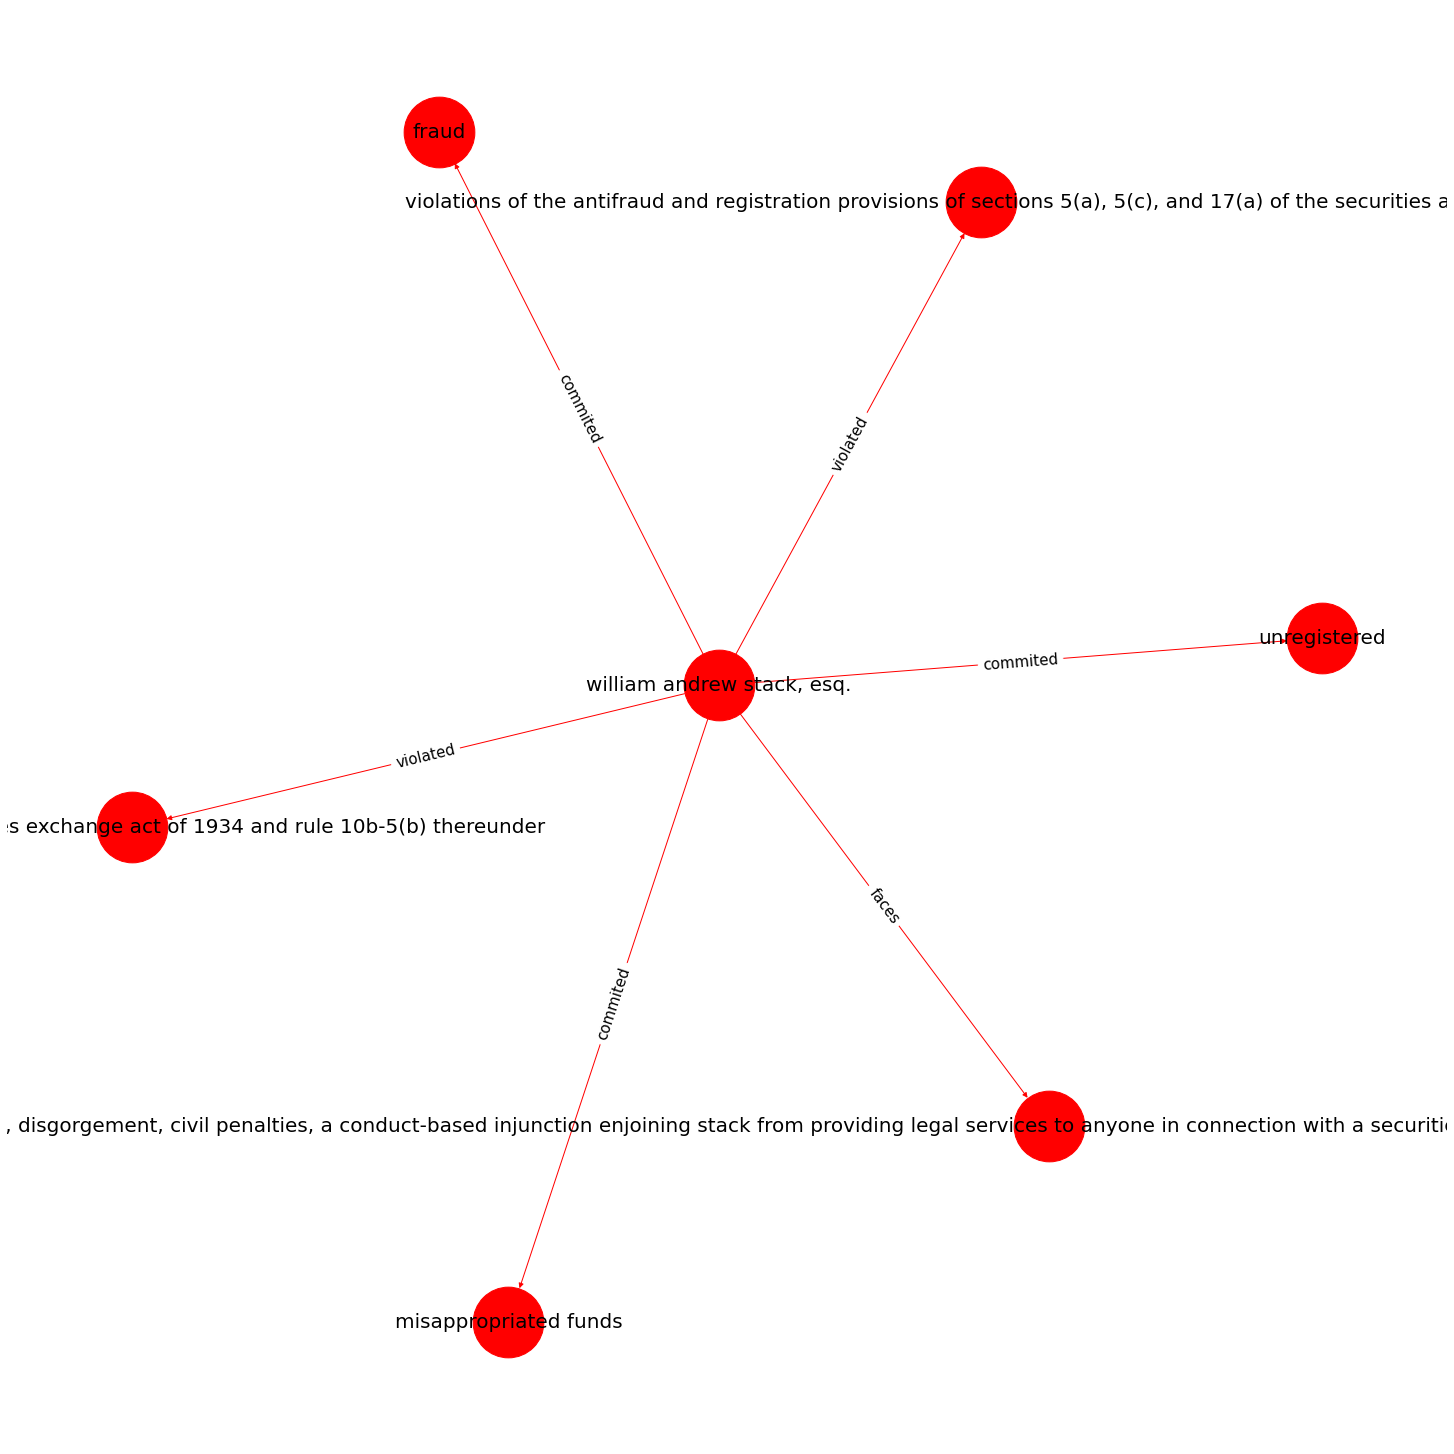

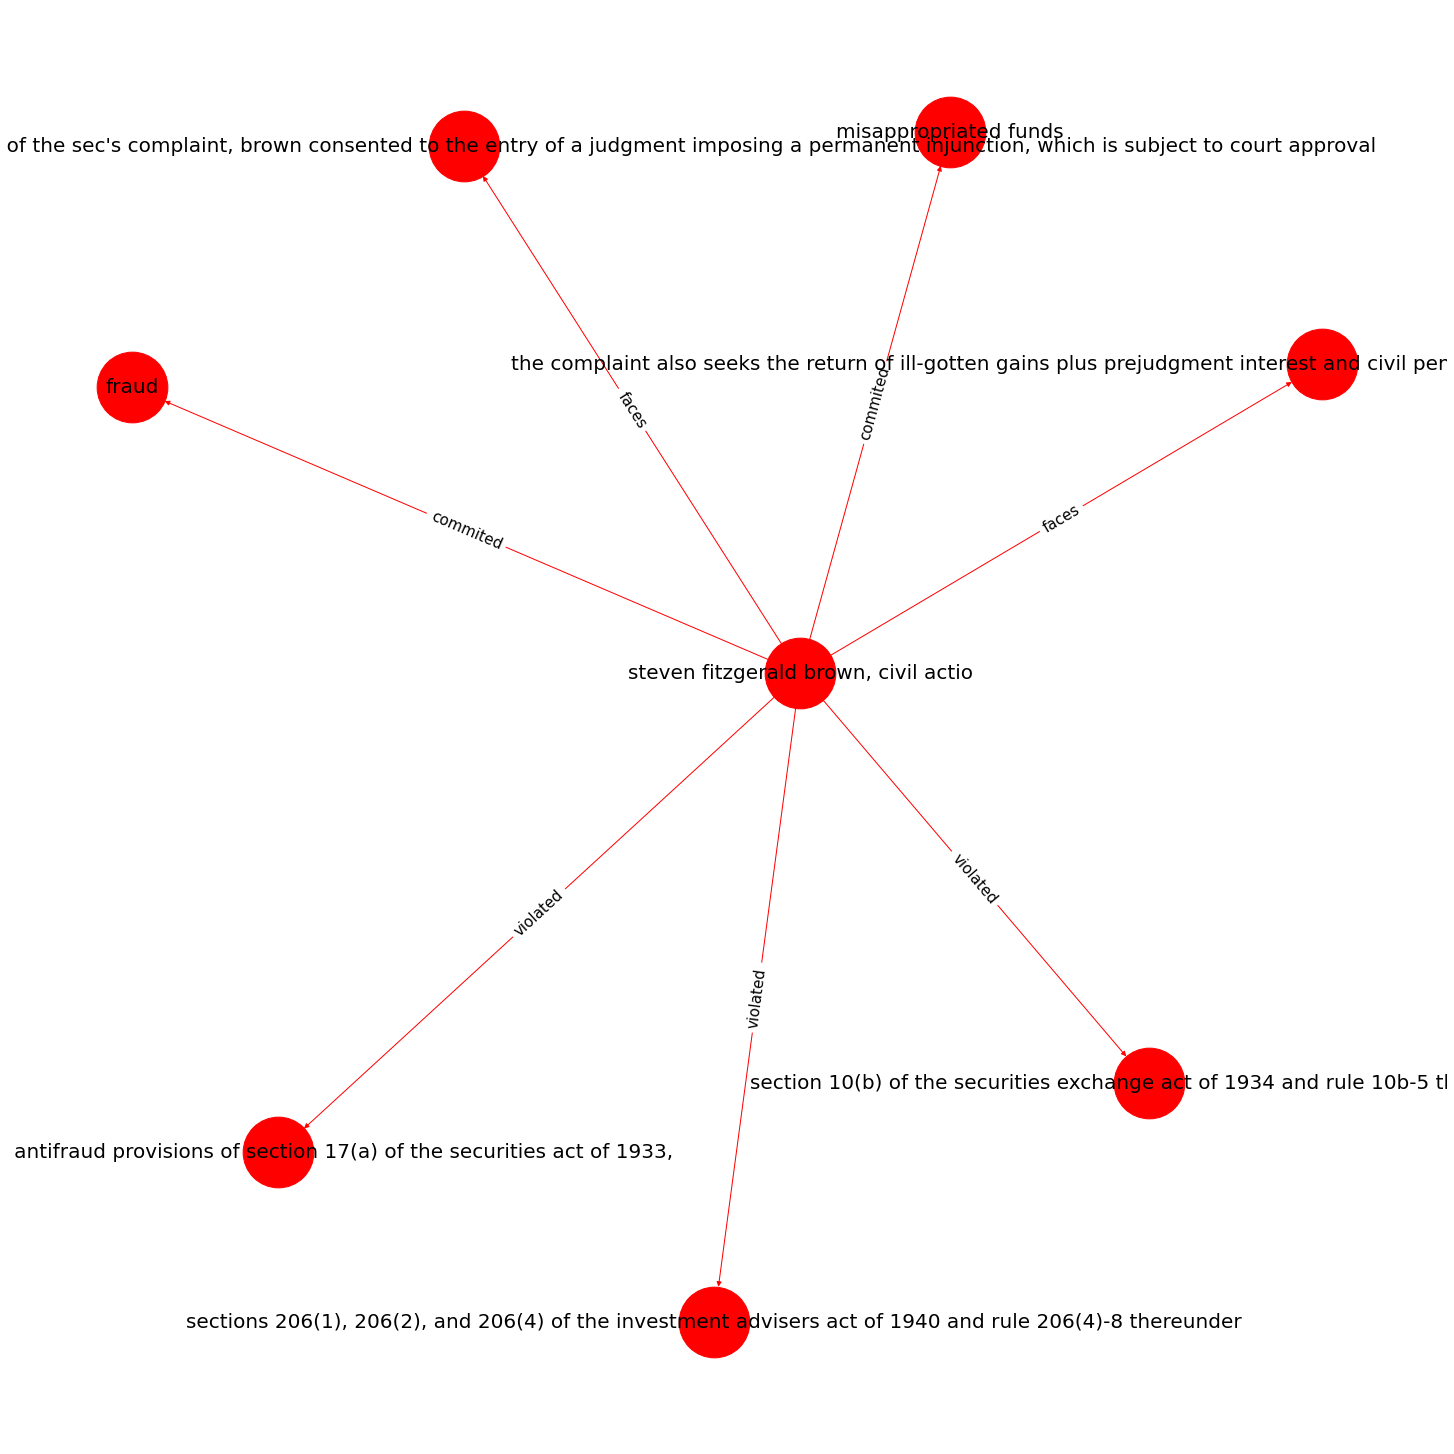

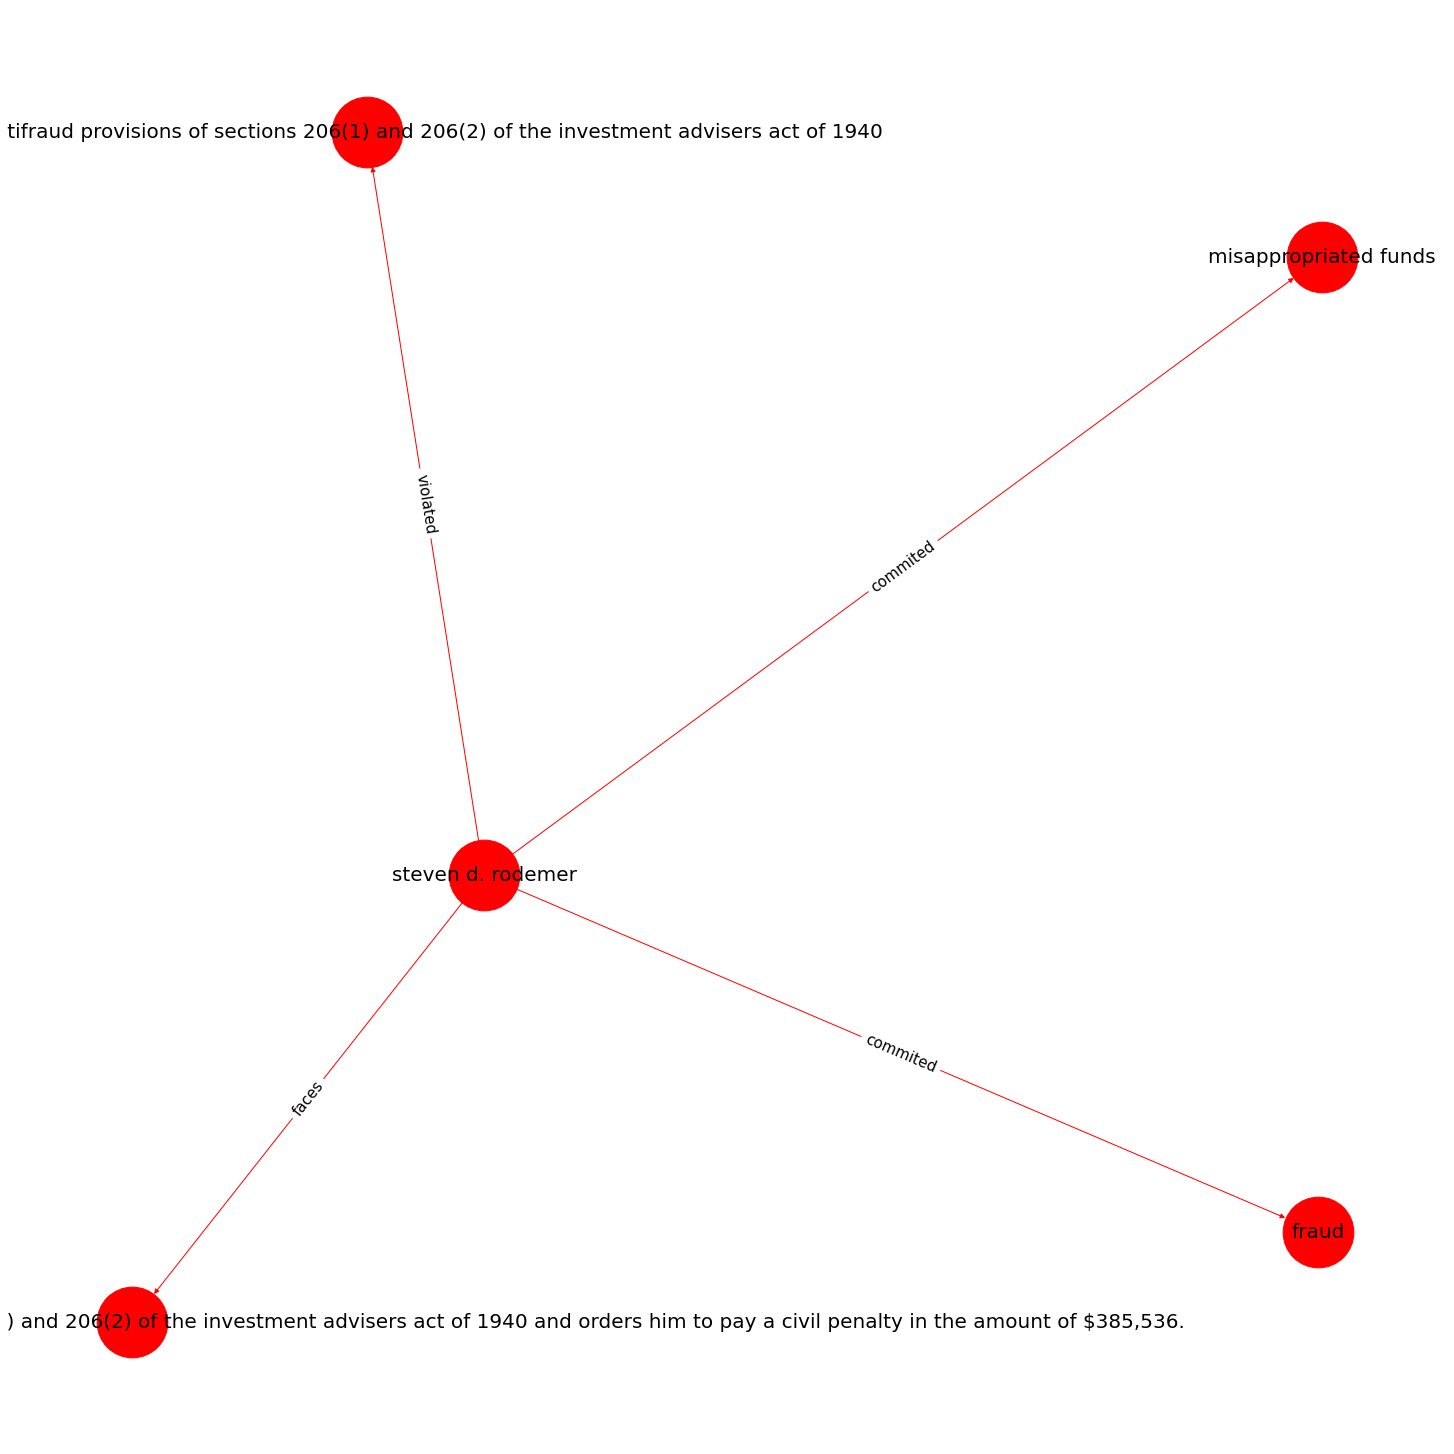

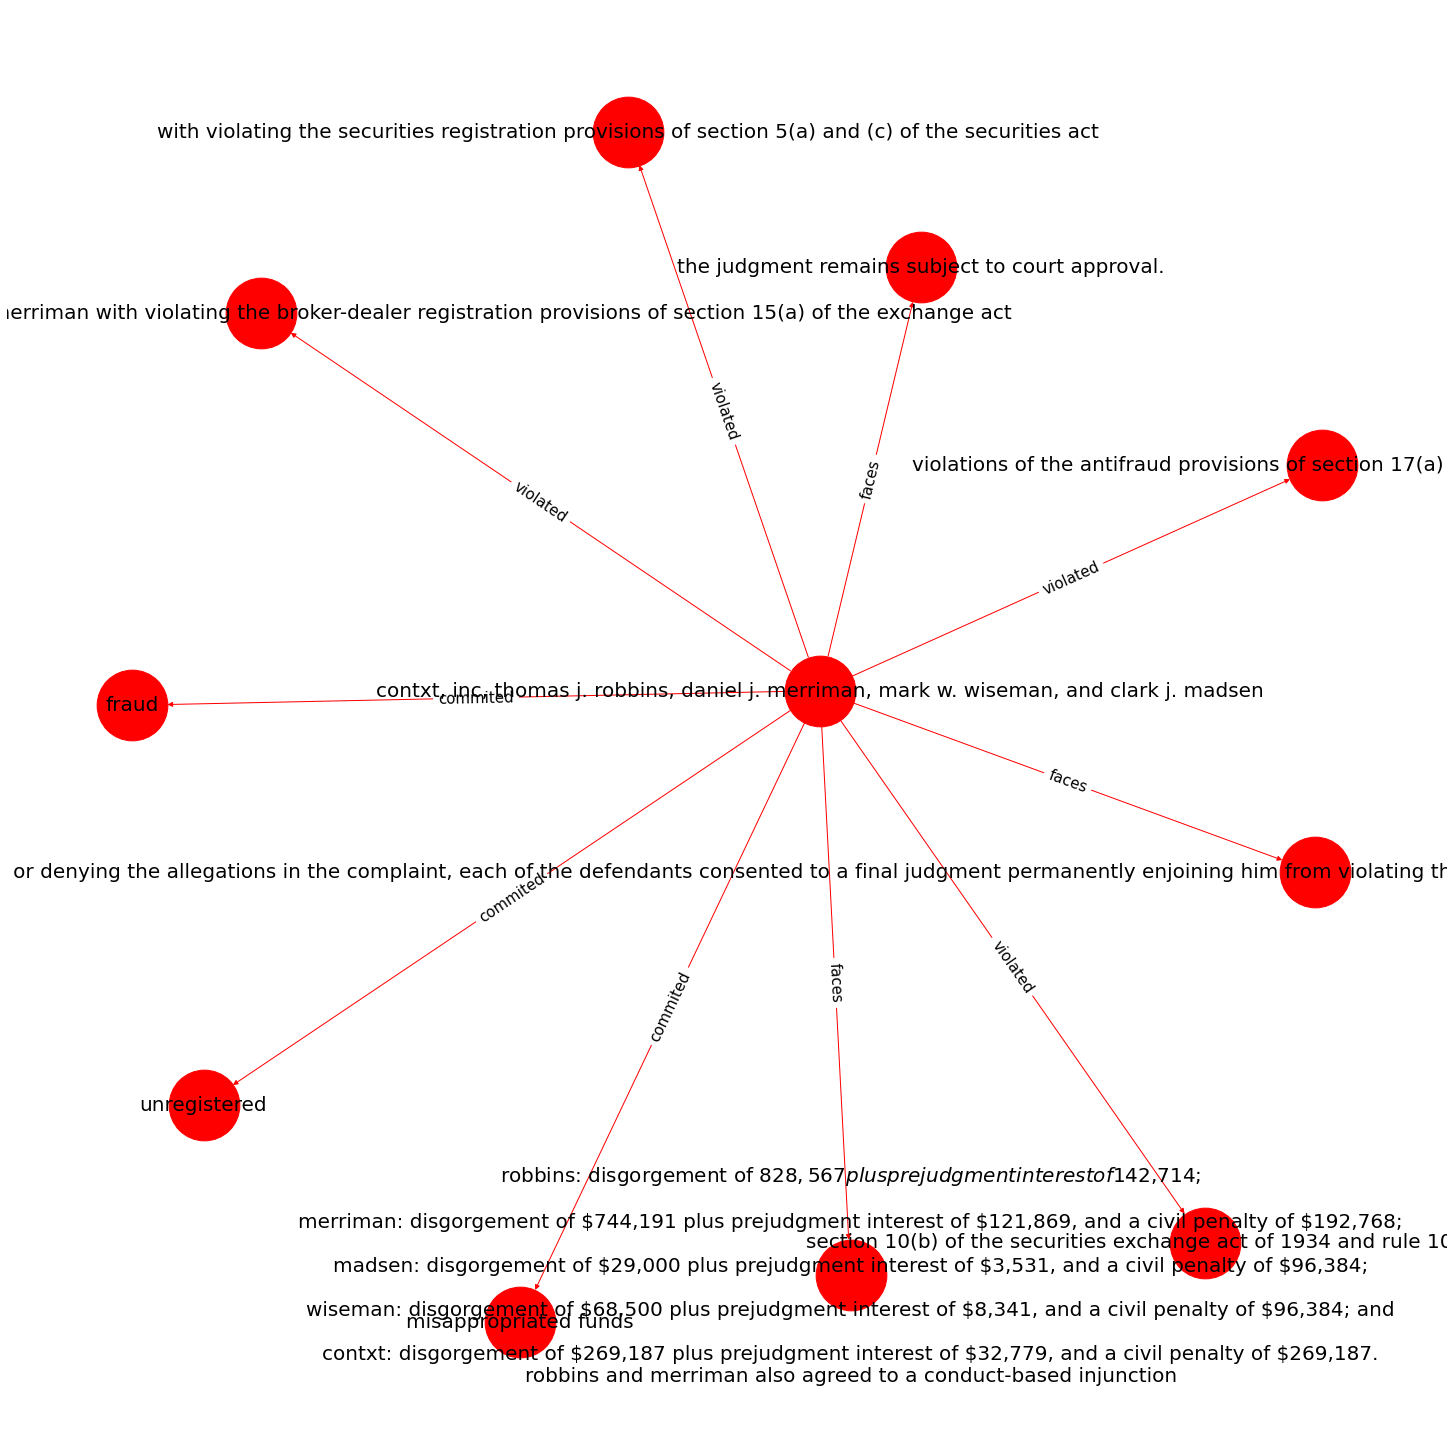

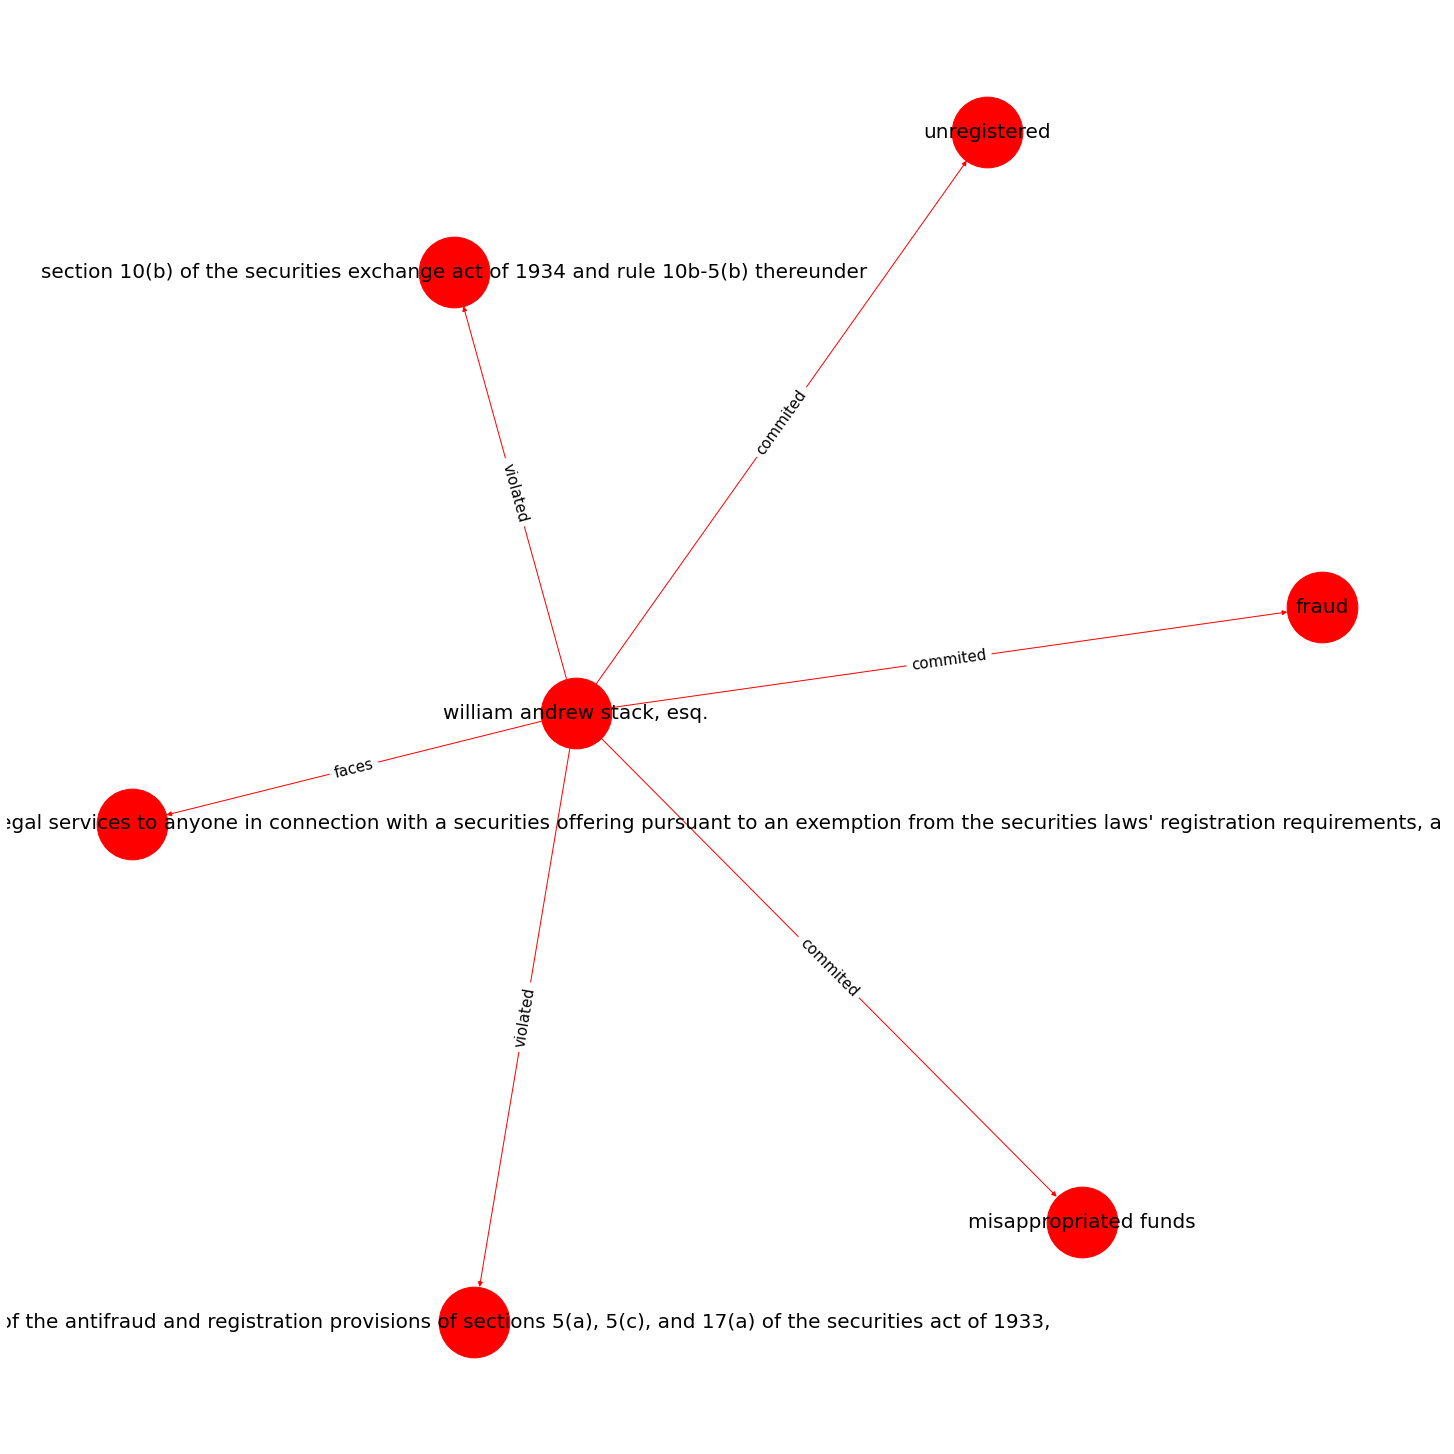

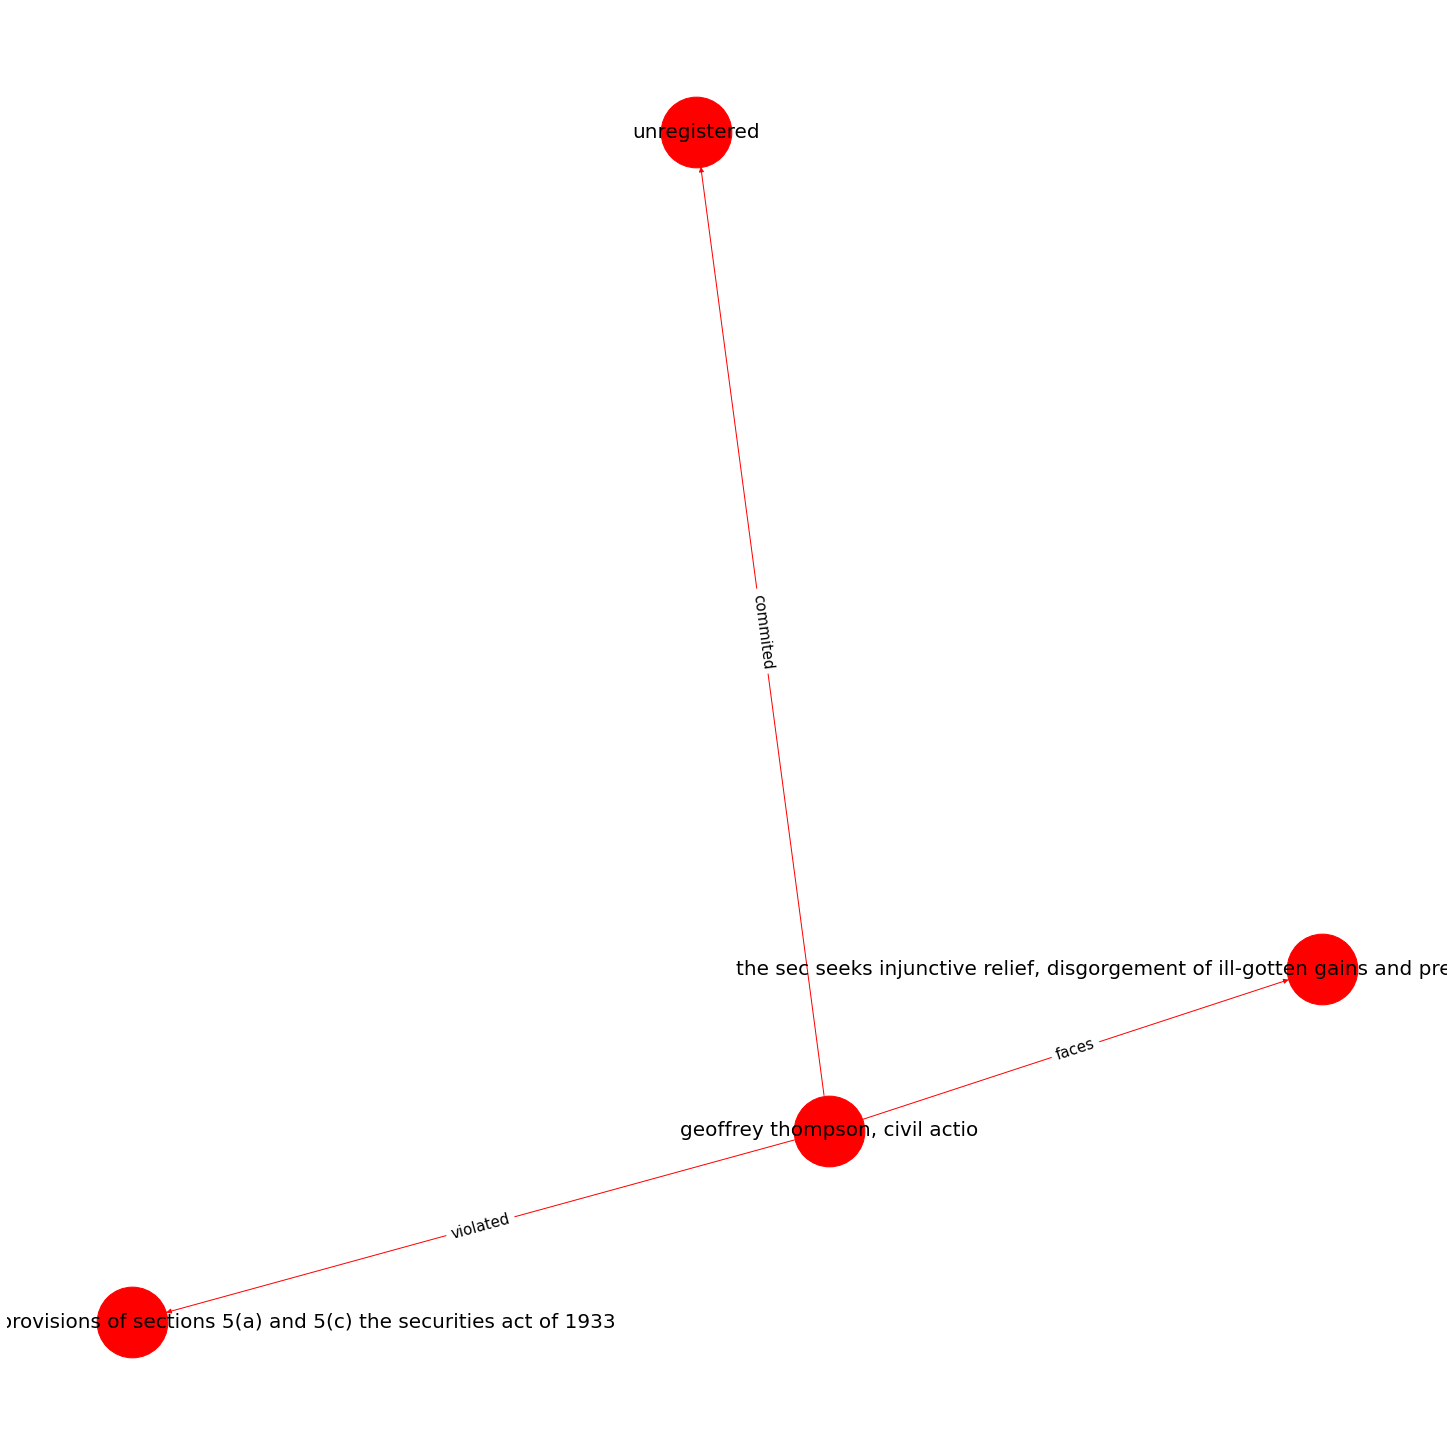

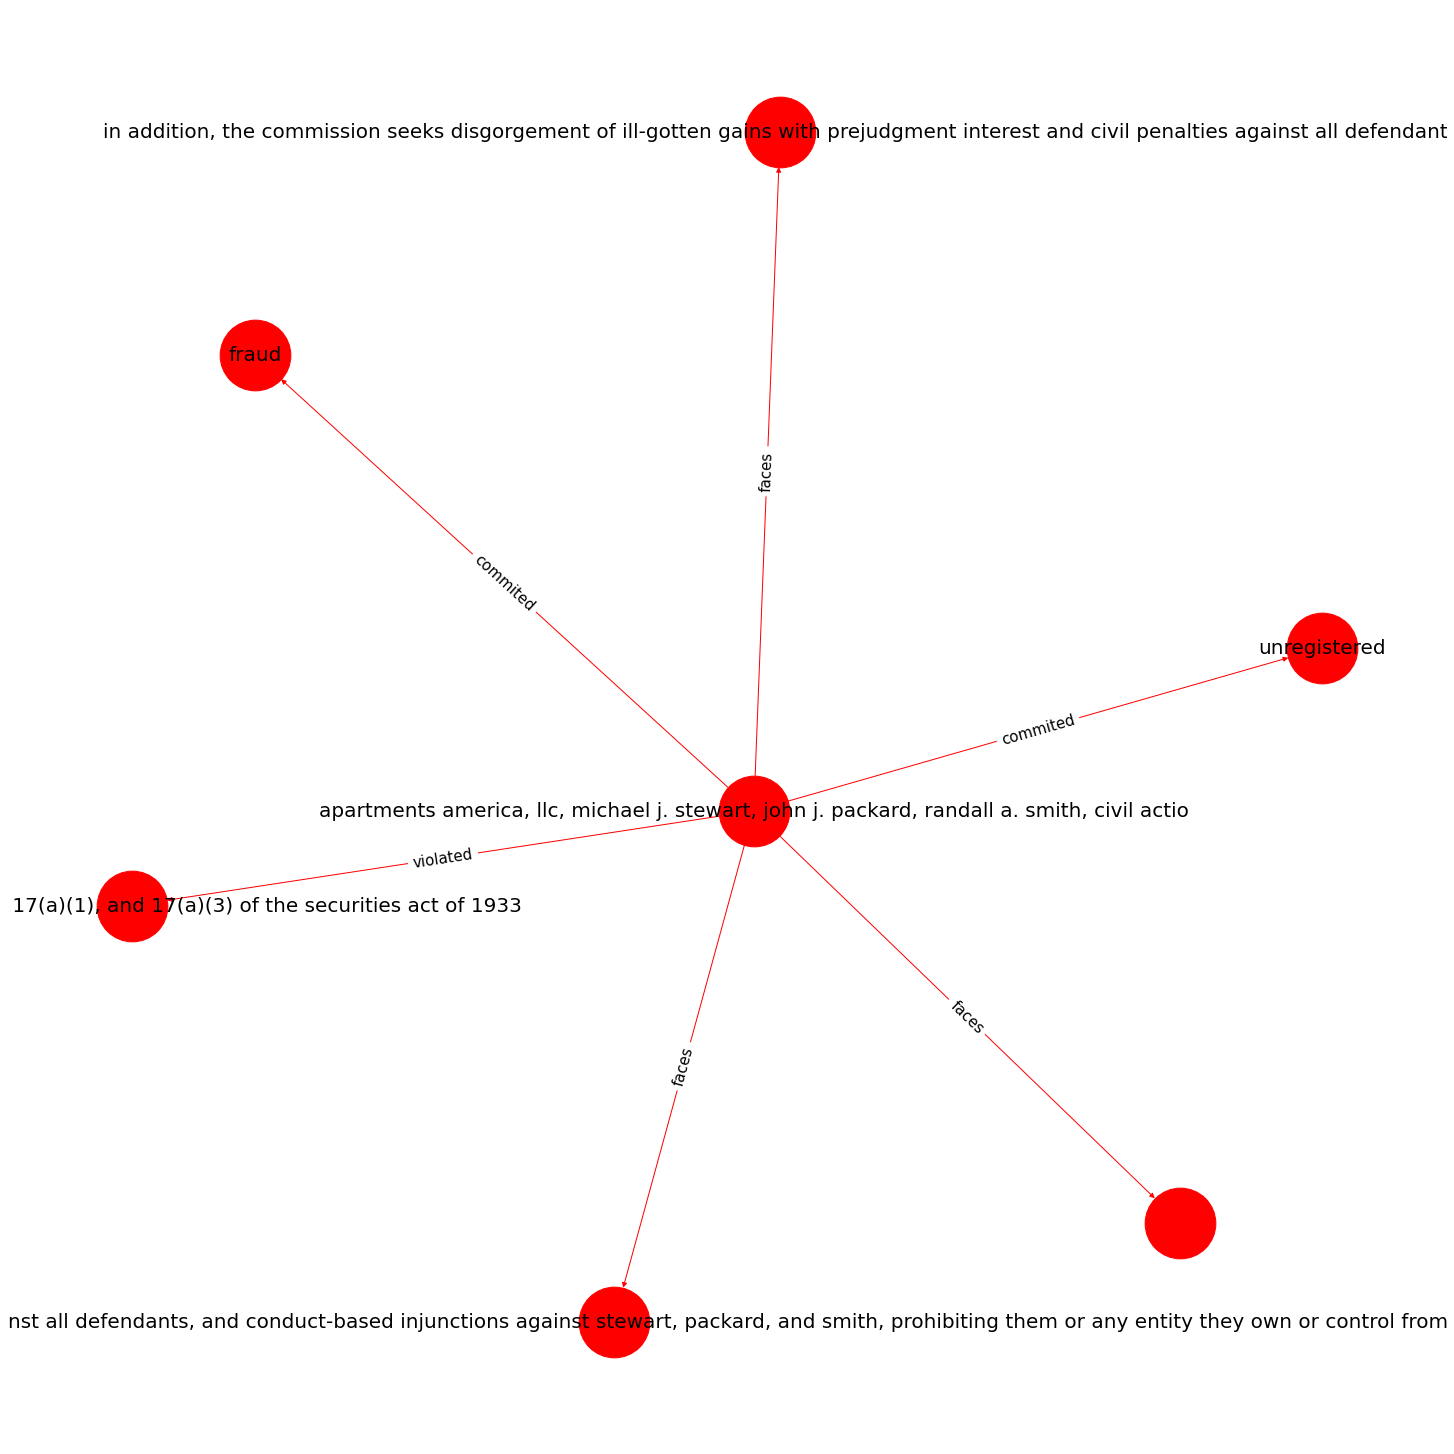

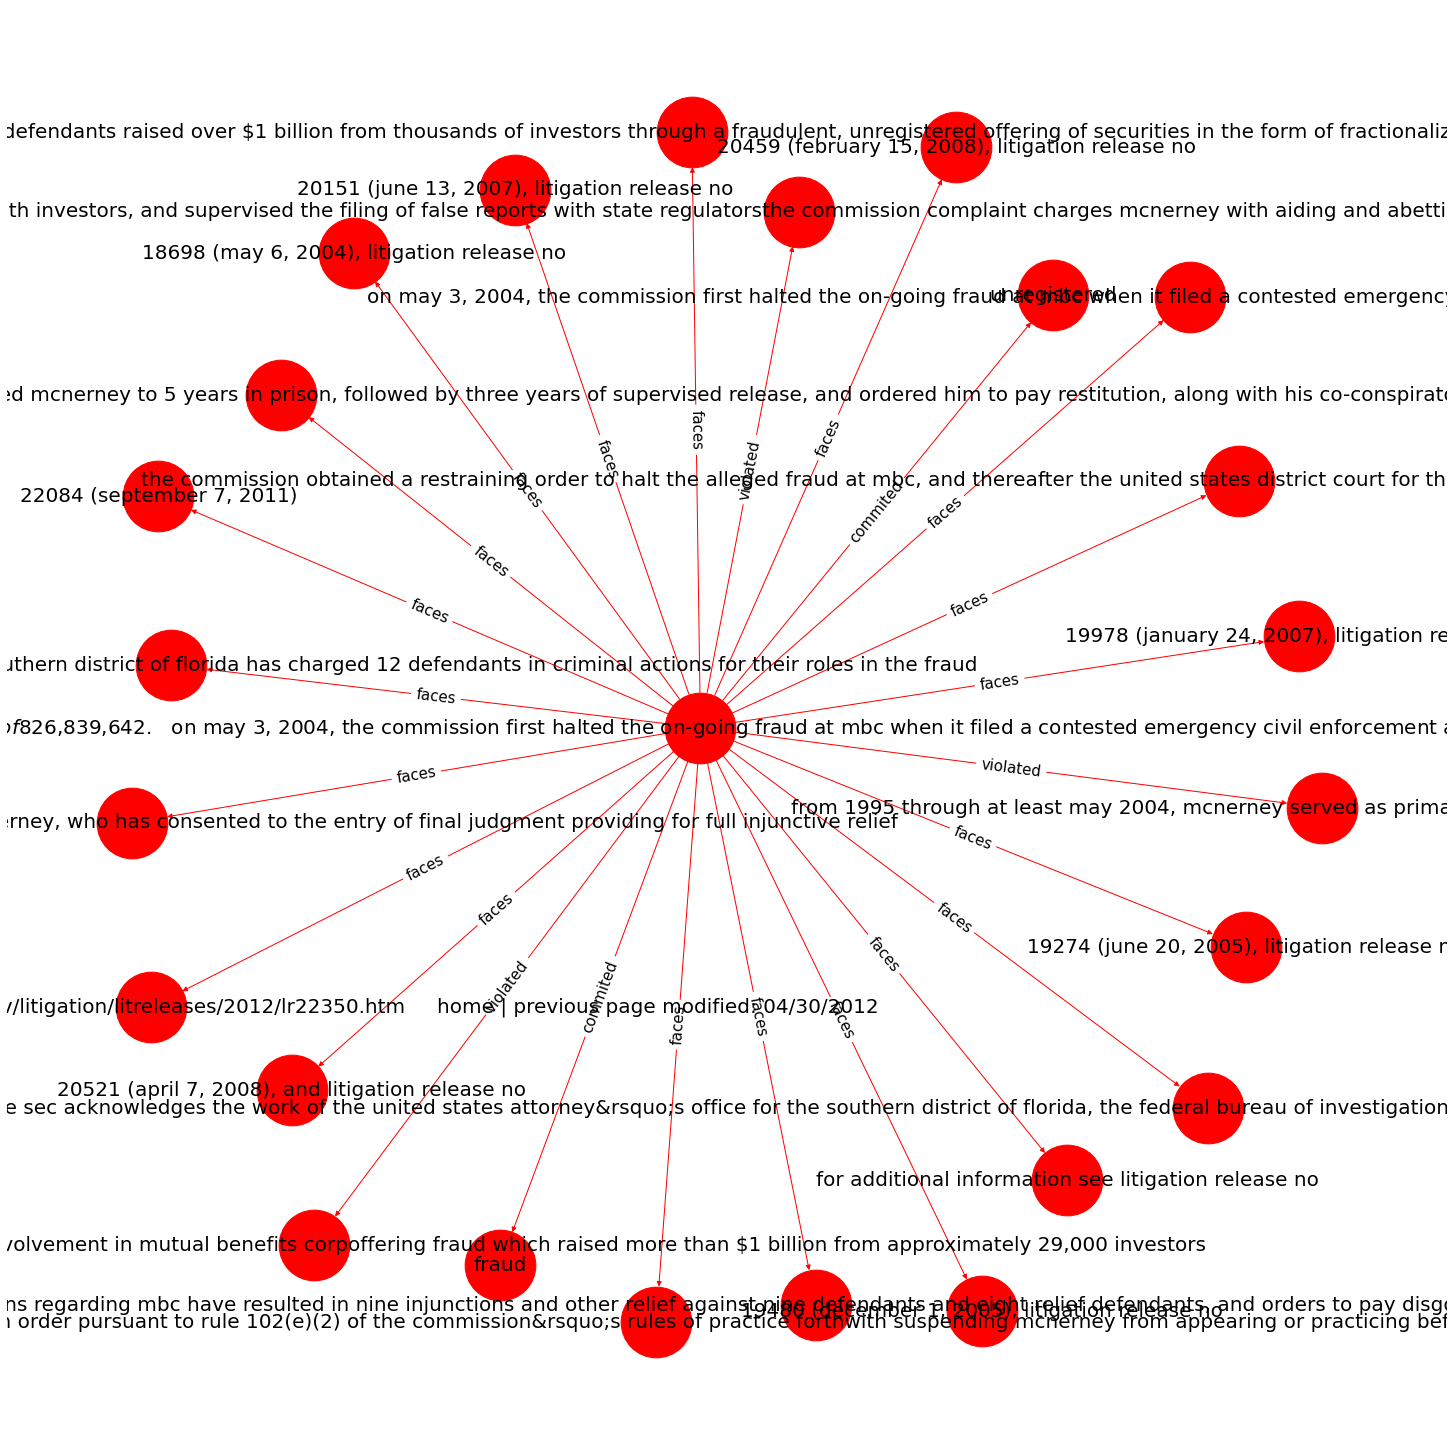

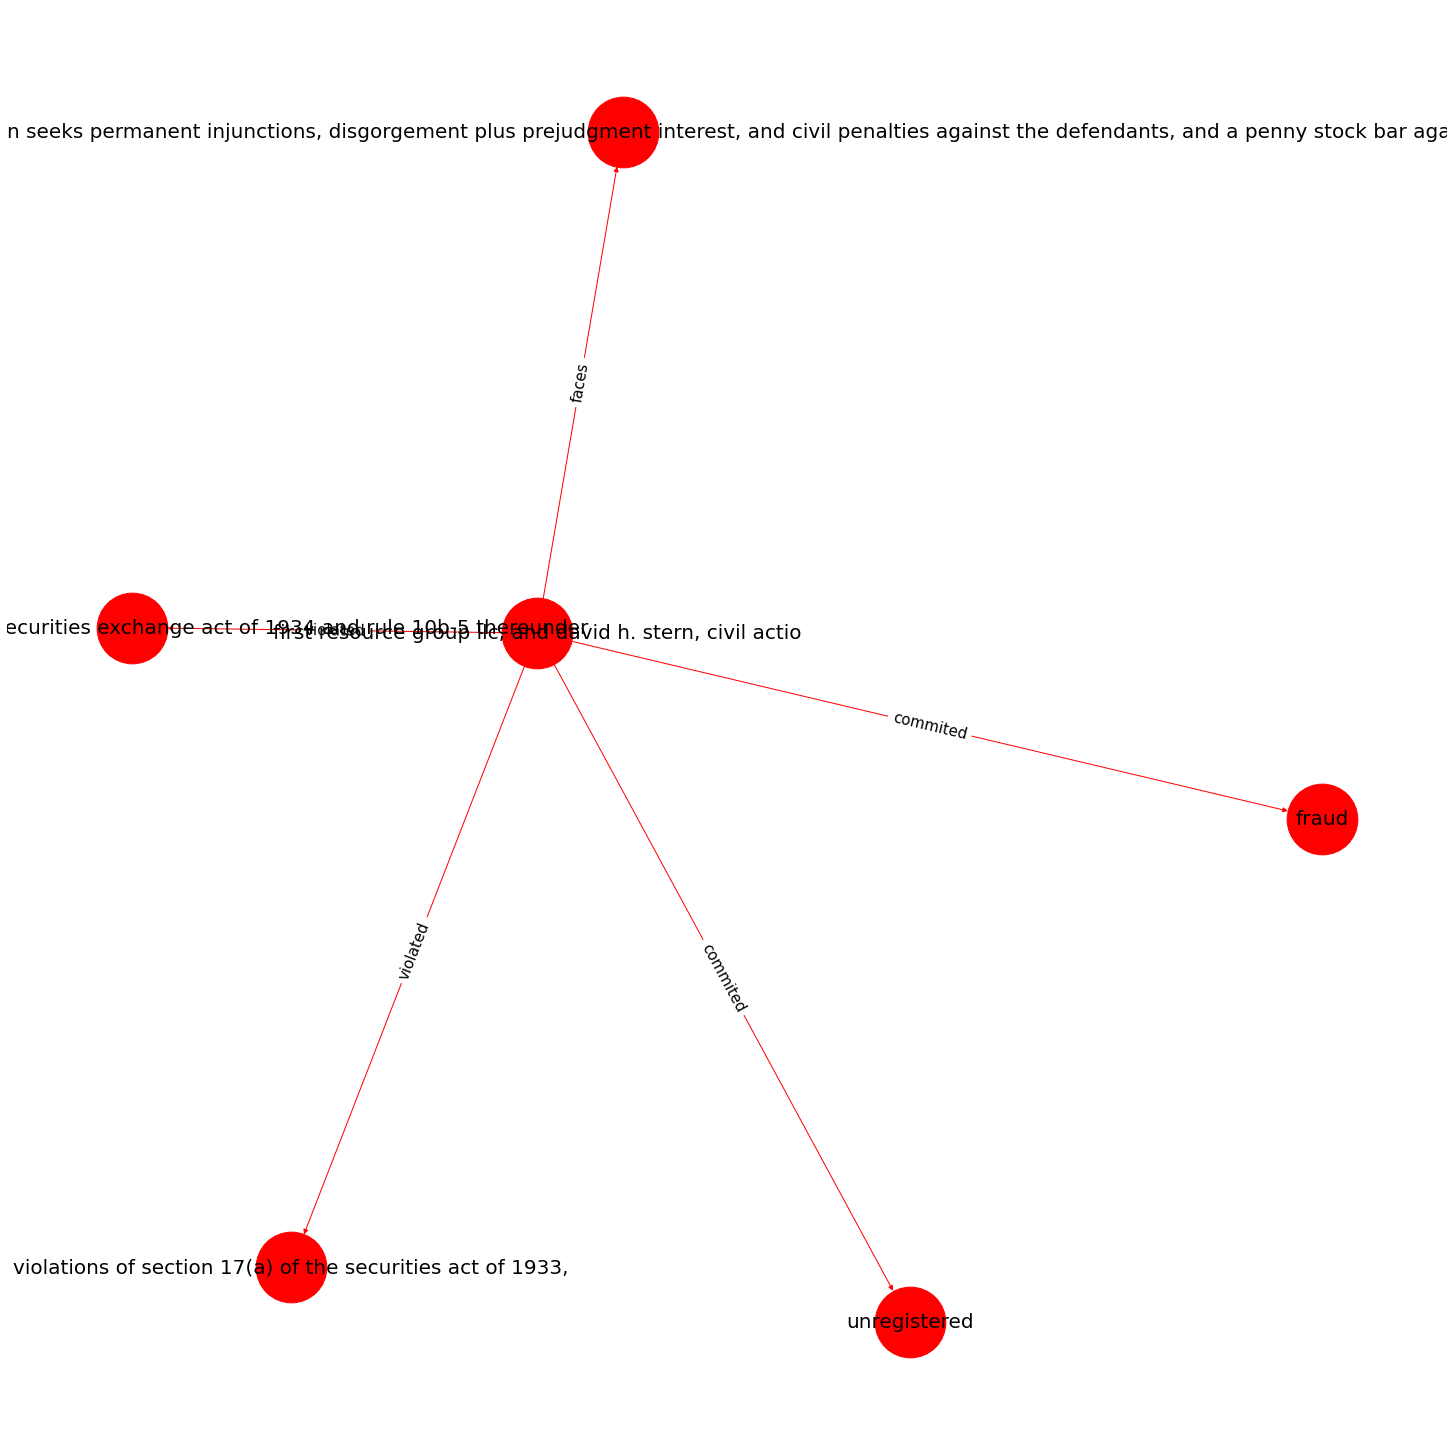

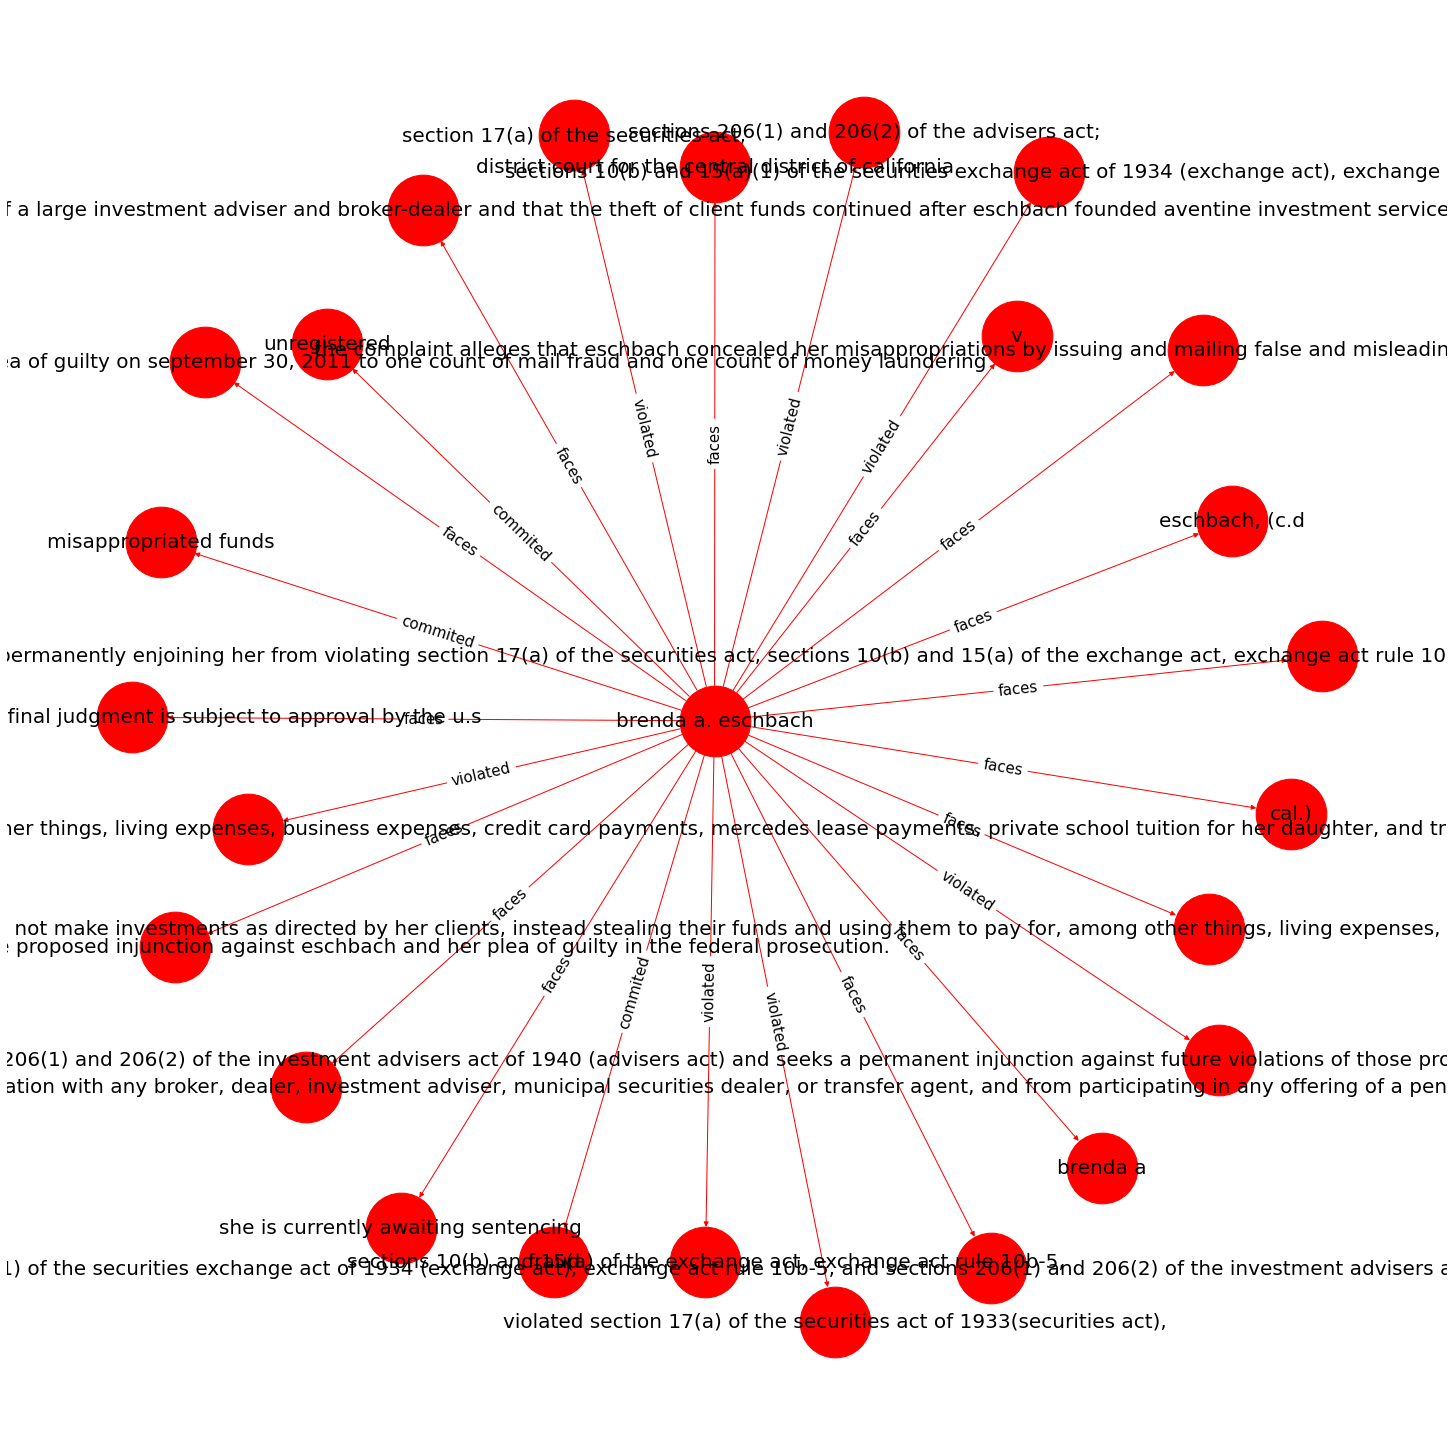

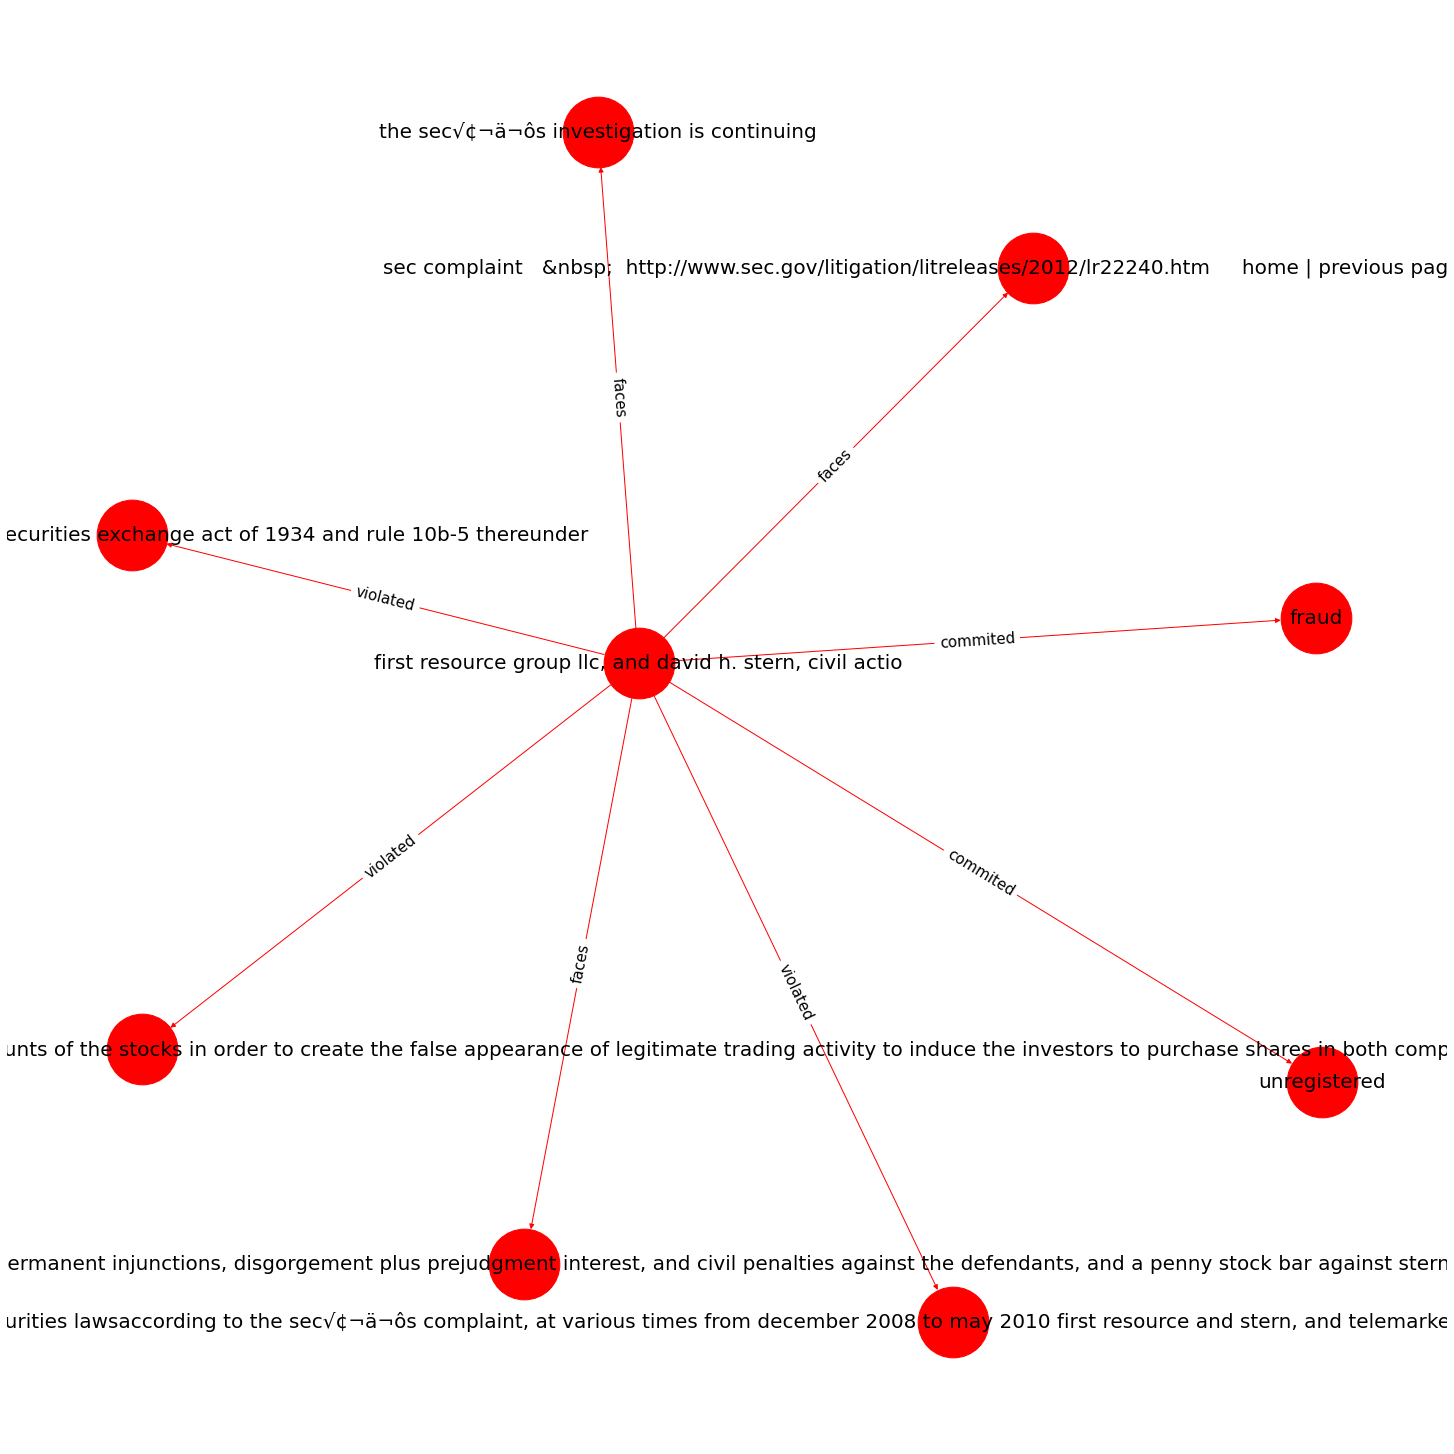

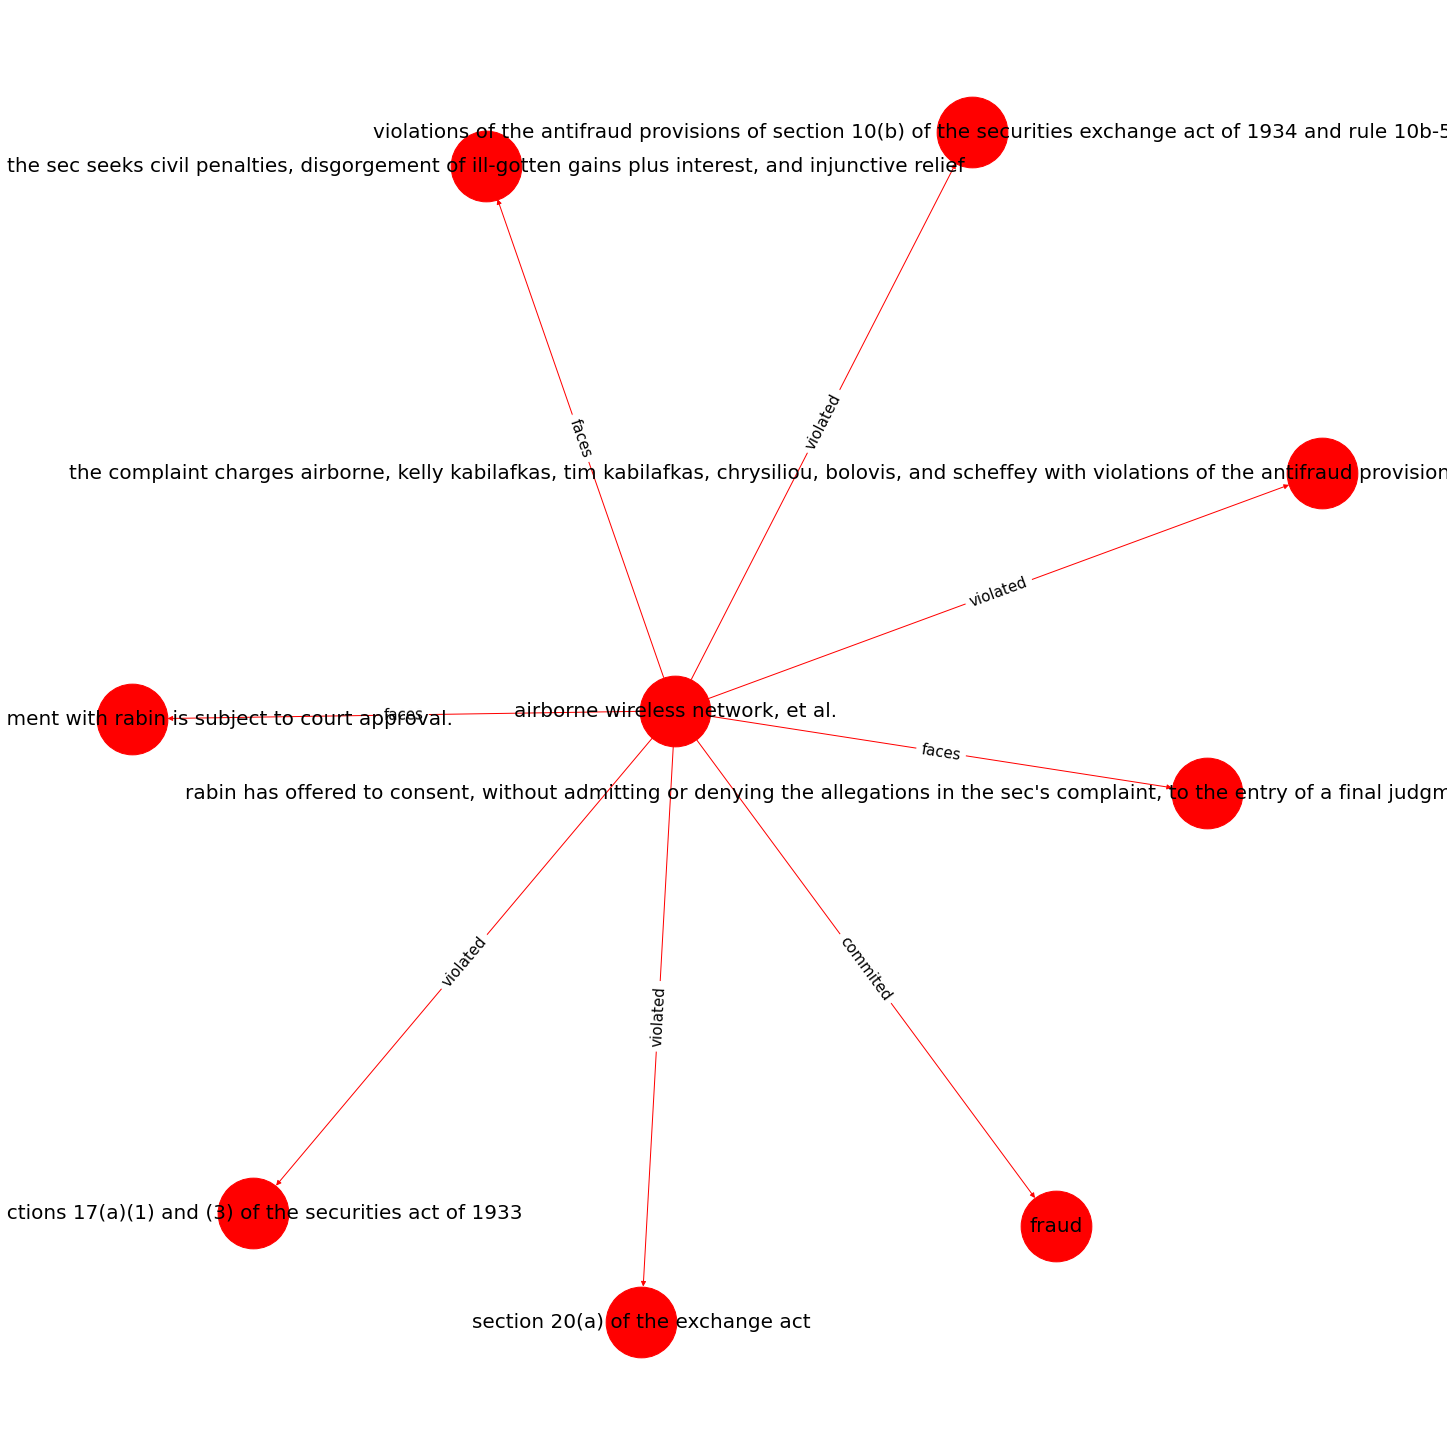

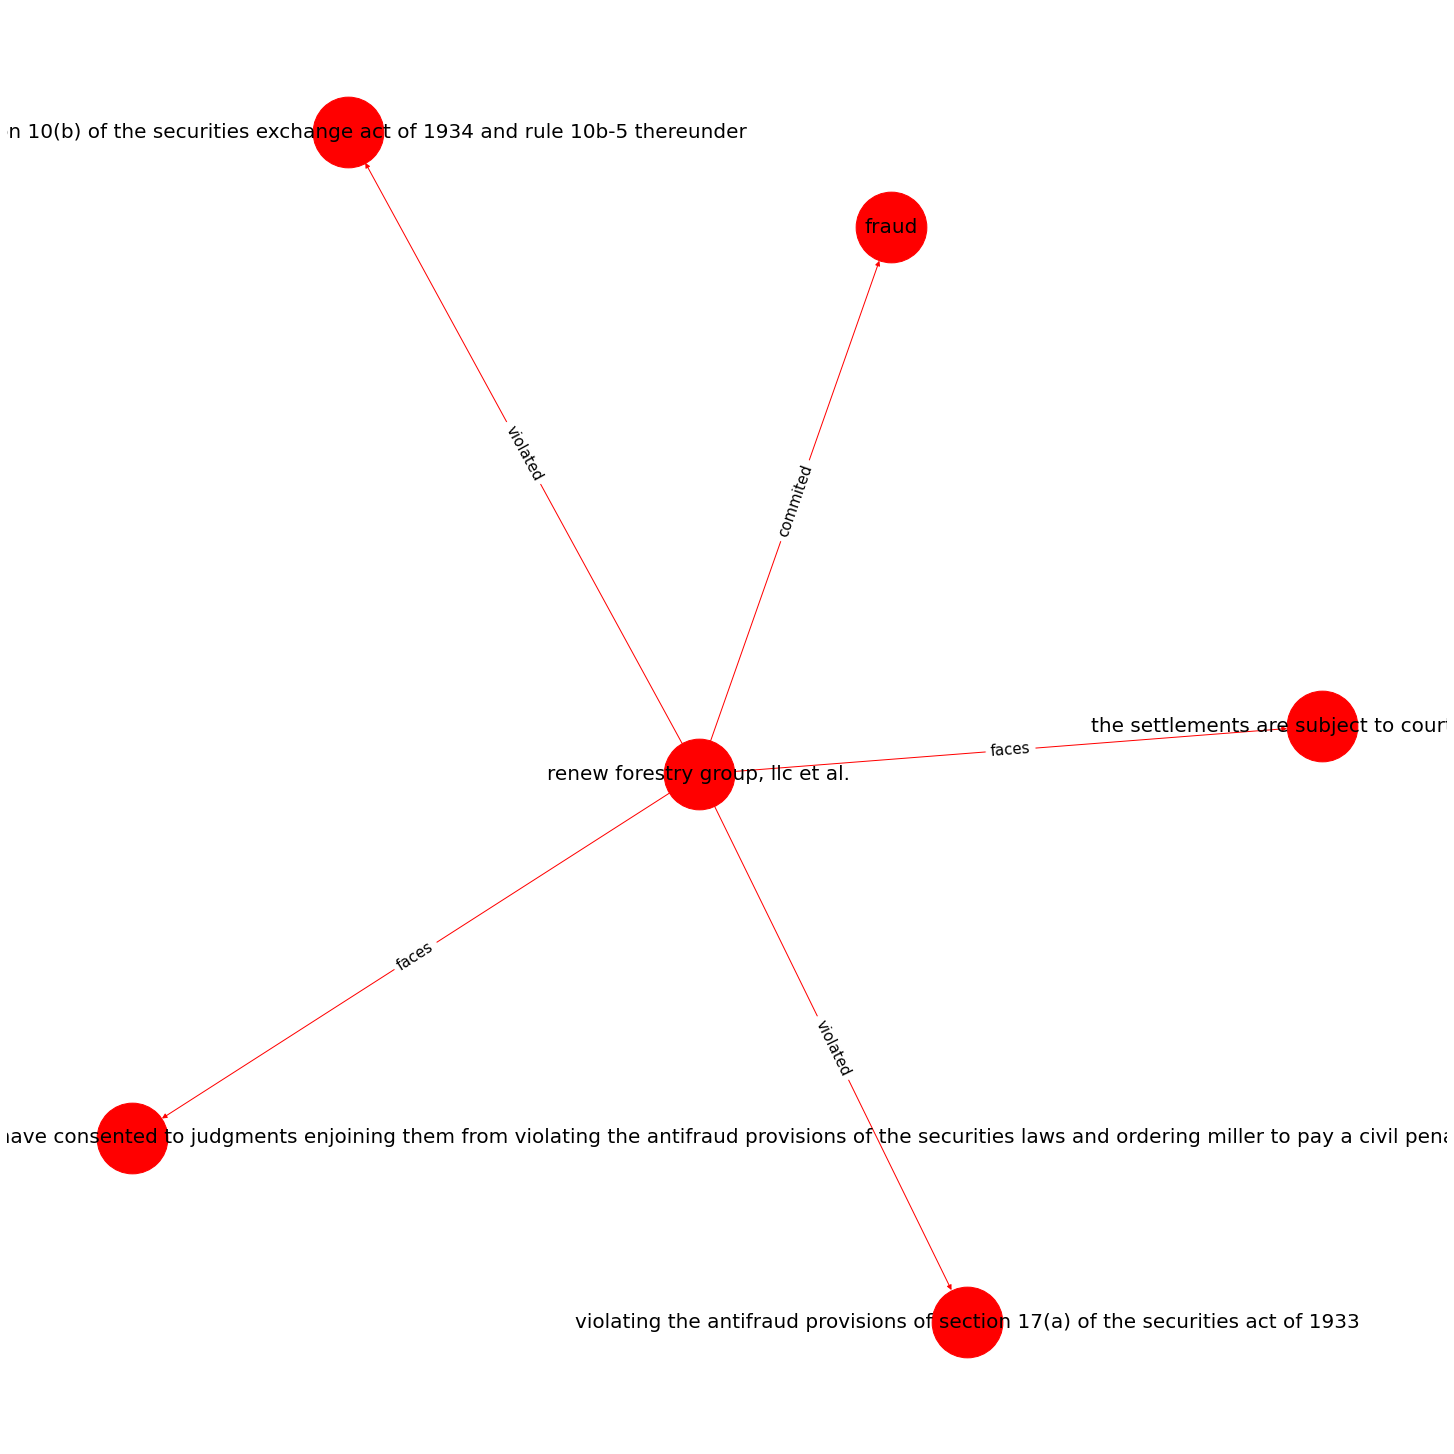

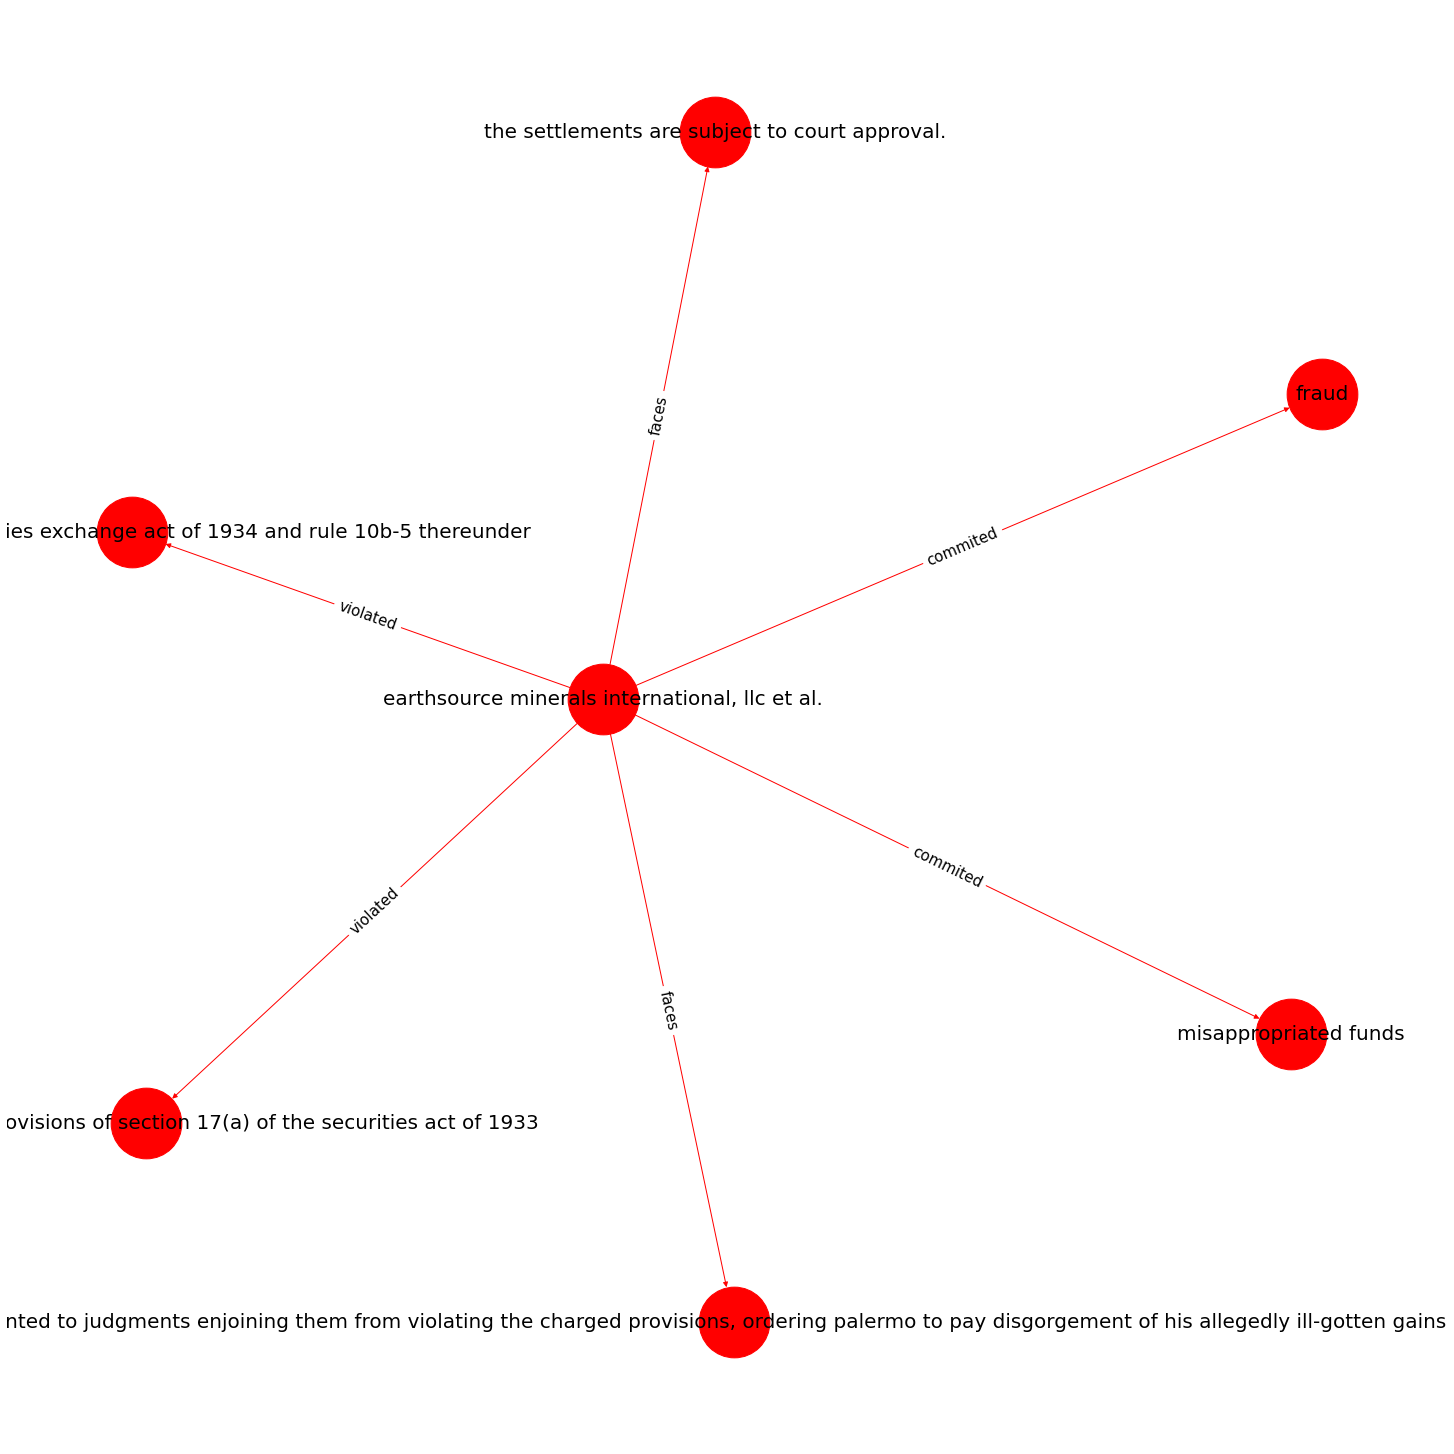

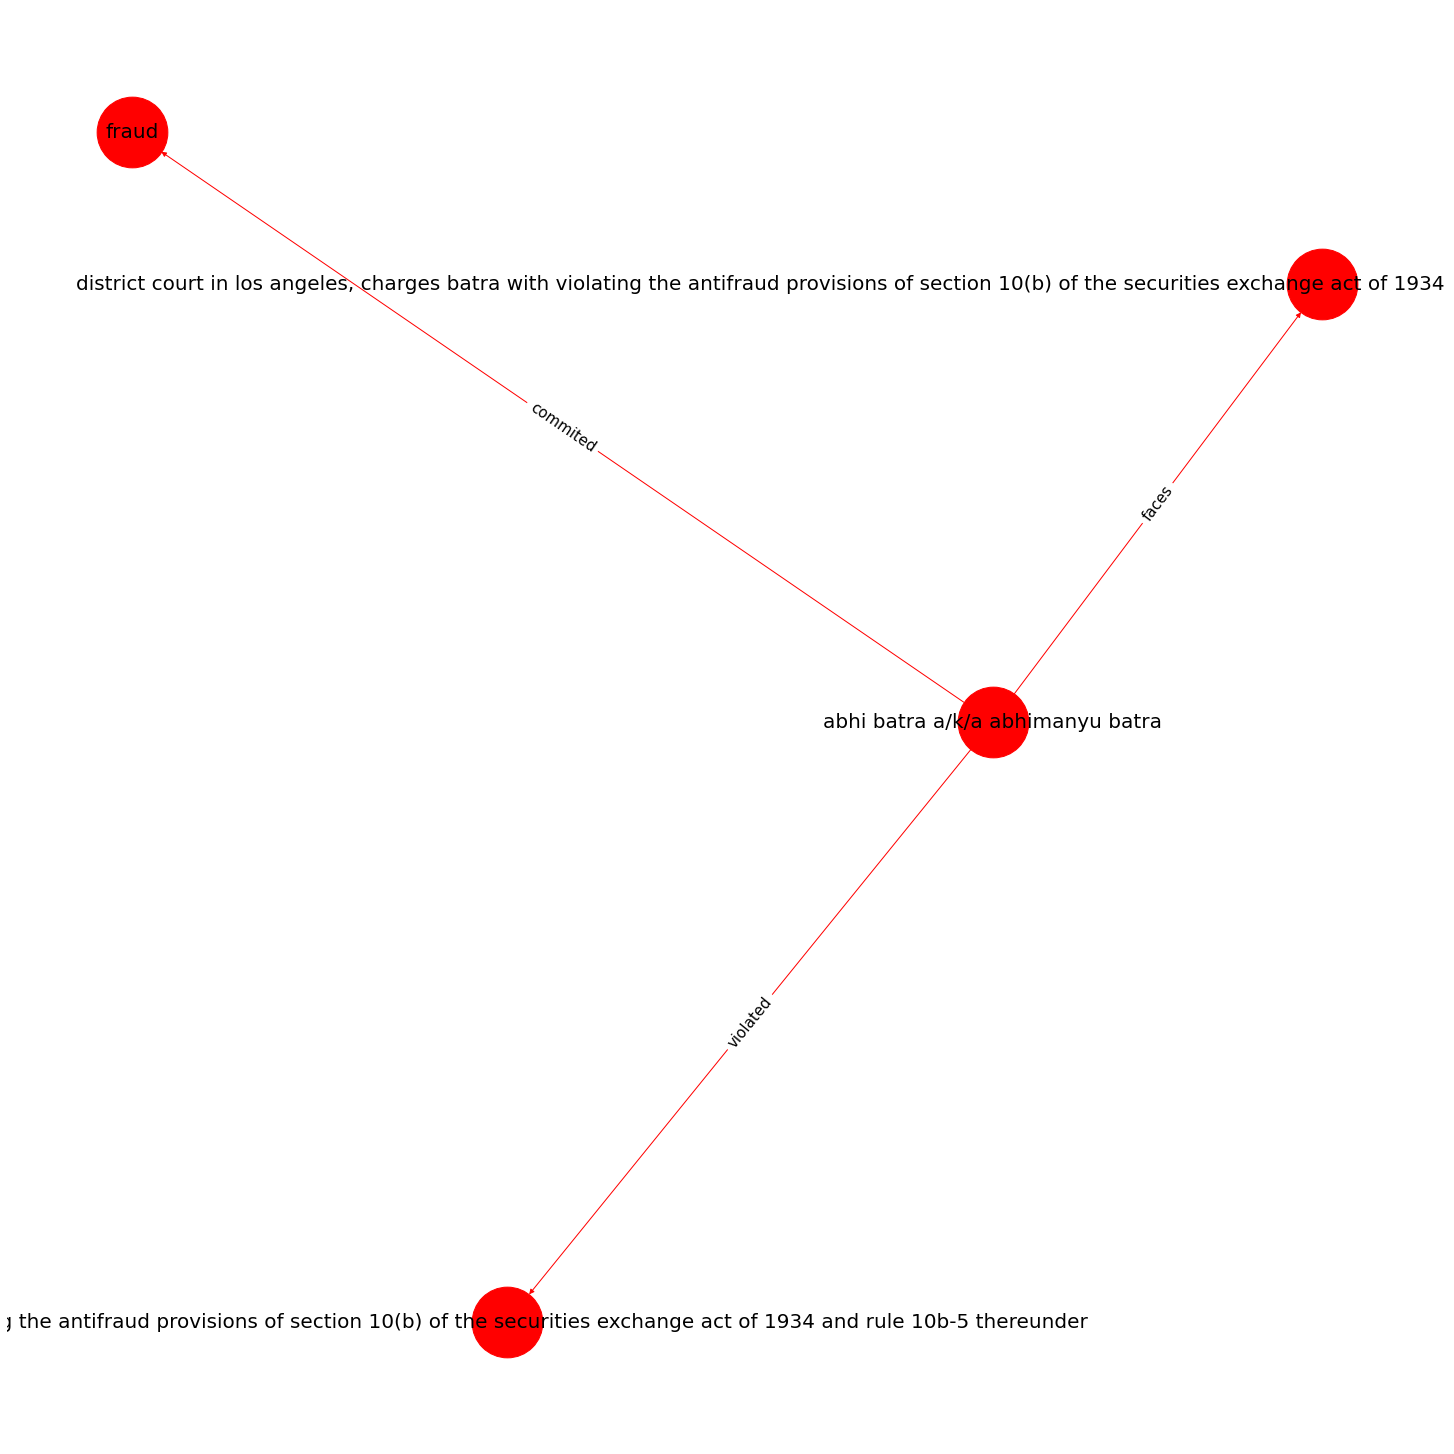

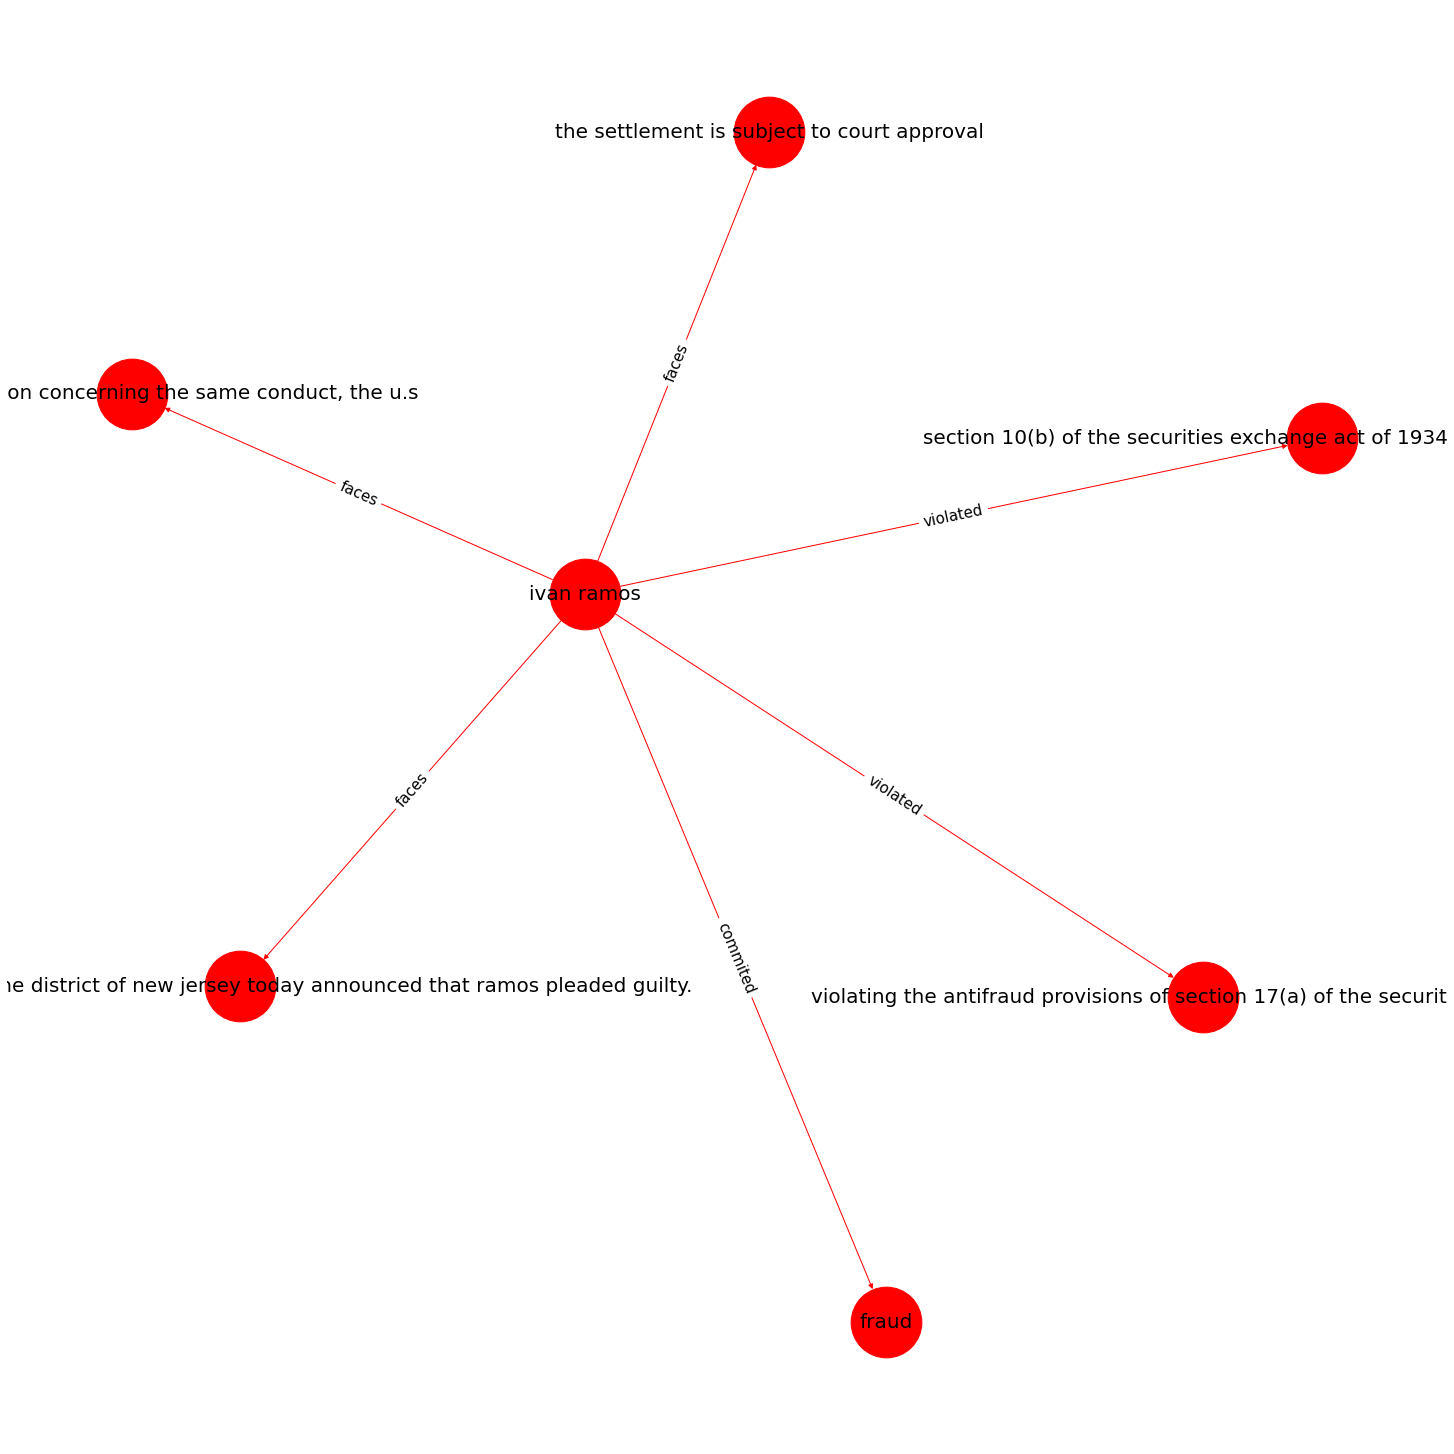

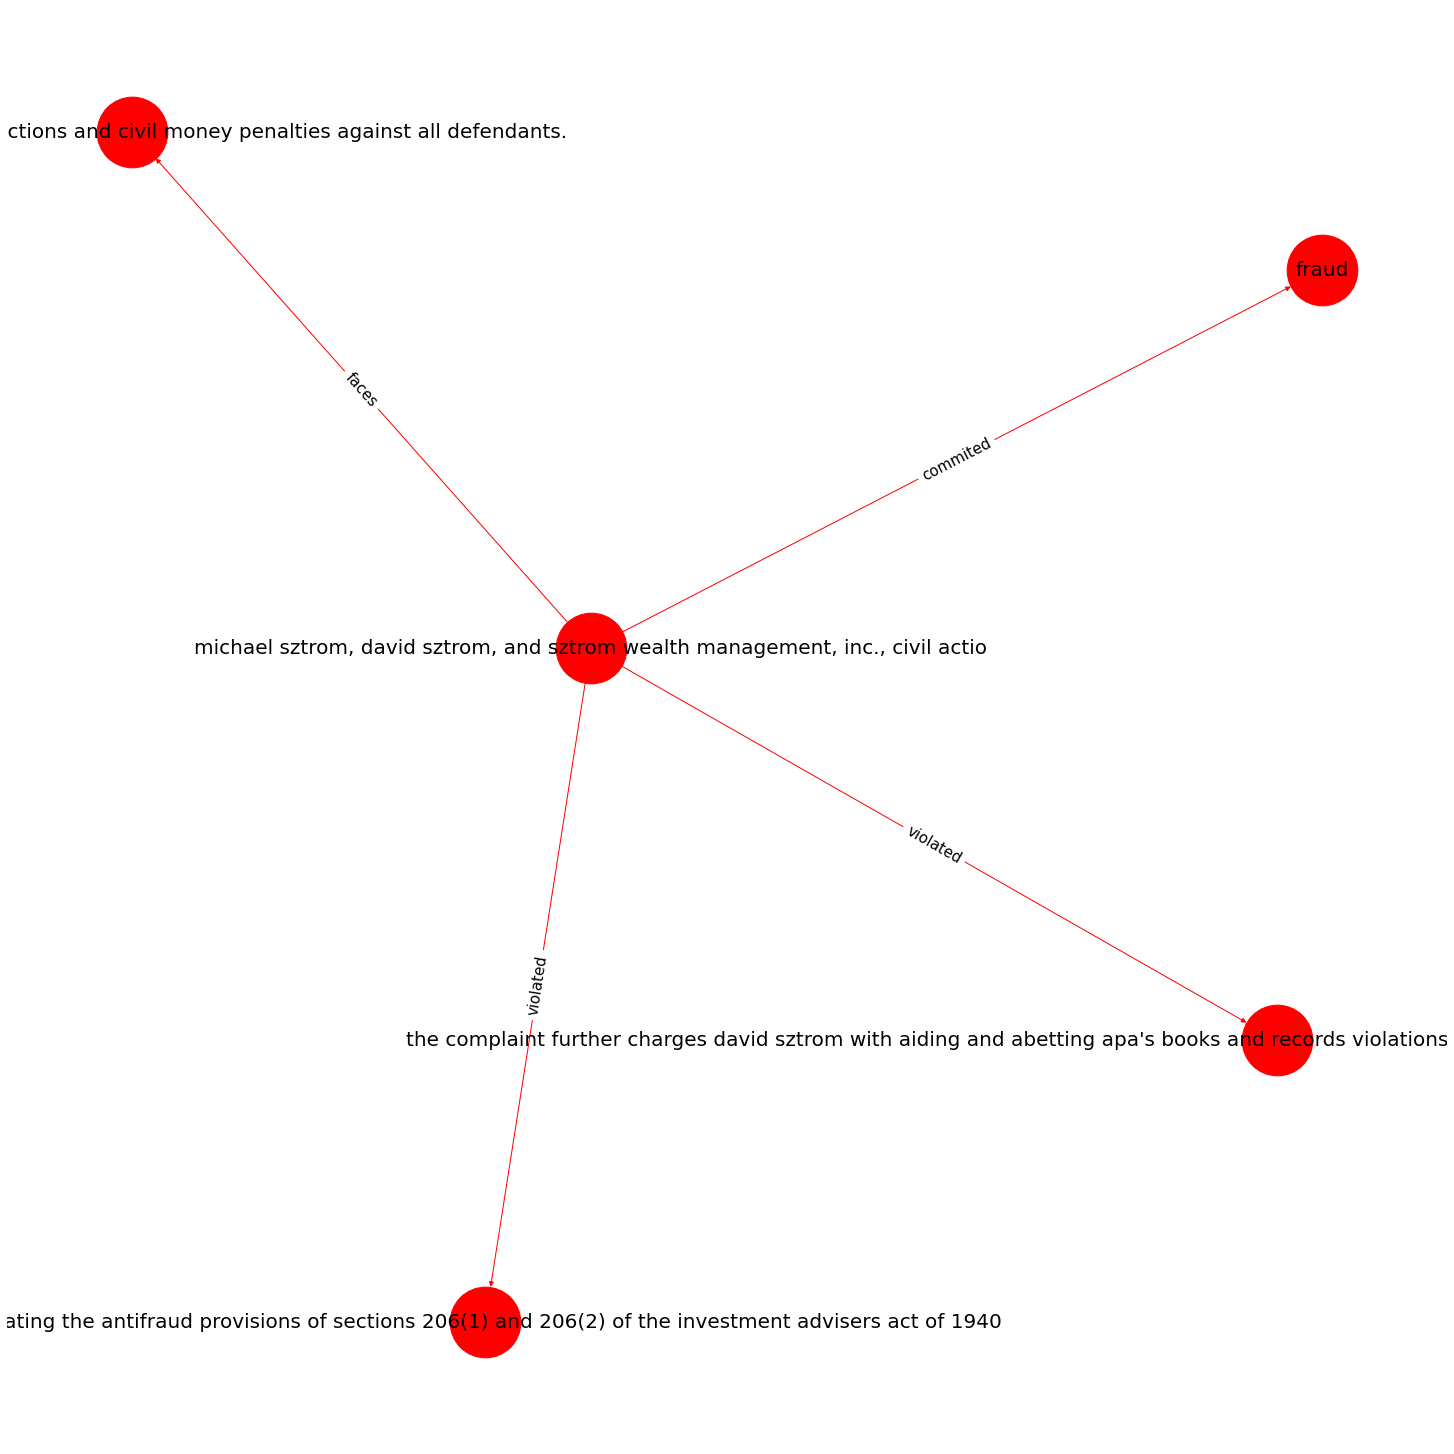

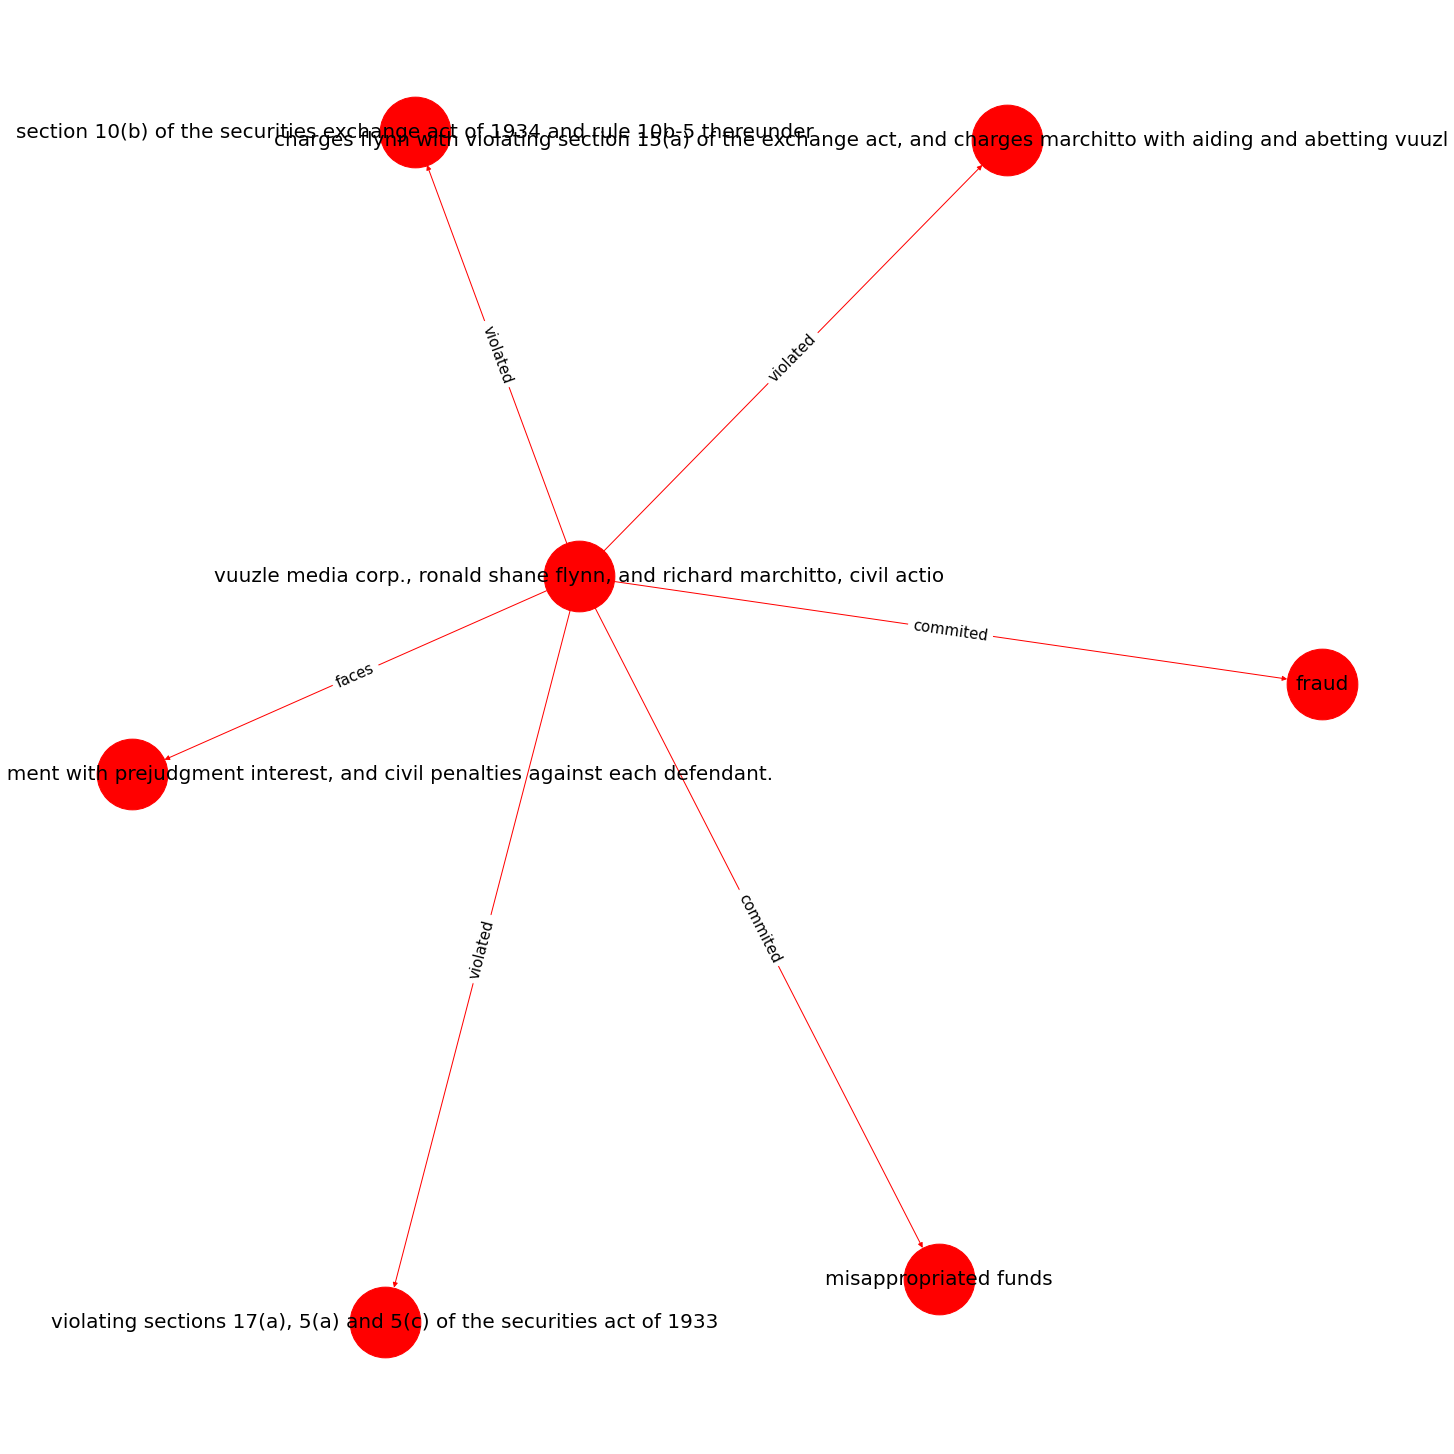

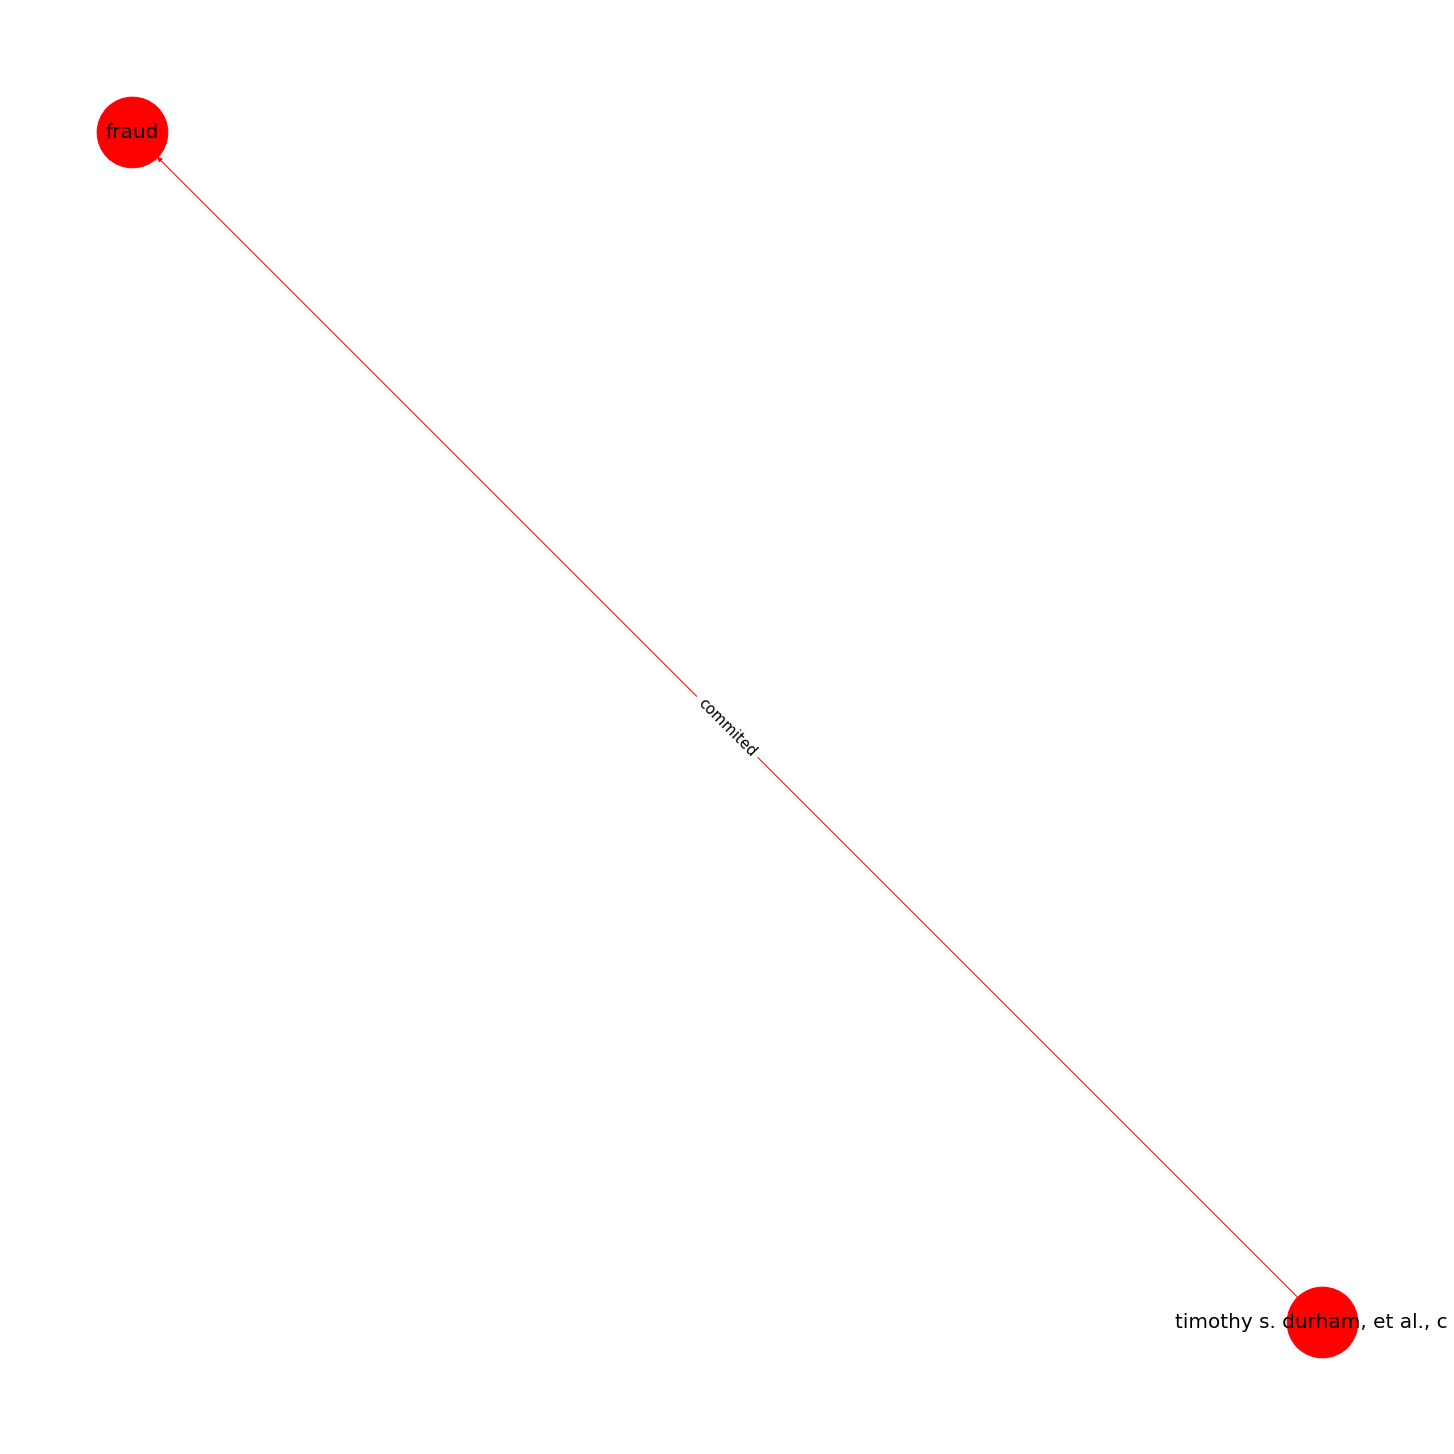

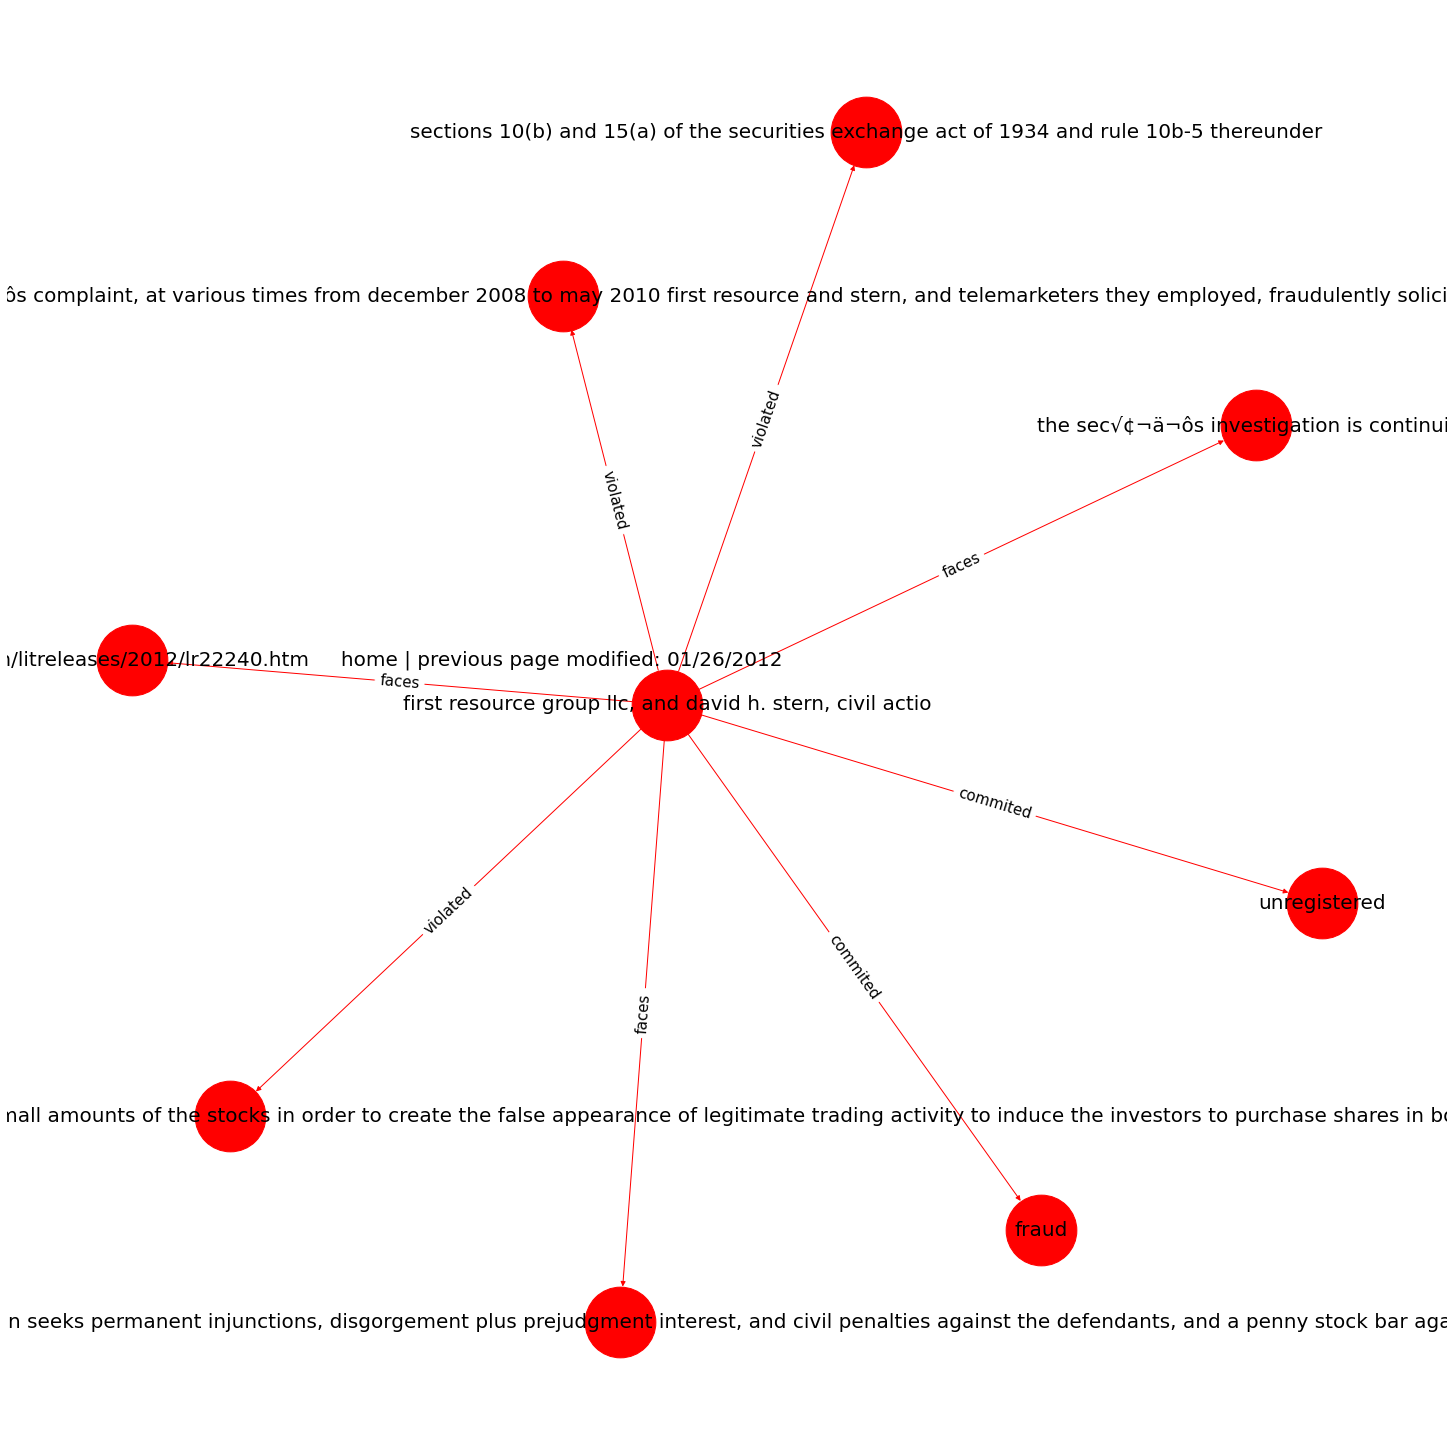

In [9]:
for i in range(len(crimes)):
    nodes = []
    for violator in violators[i]:
        for crime in crimes[i]:
            nodes.append((violator, 'commited', crime))
        for violation in violations[i]:
            nodes.append((violator, 'violated', violation))
        for action in actions[i]:
            nodes.append((violator, 'faces', action))

    create_graph(nodes, 1)
    plt.savefig('./images/revamped_kg' + str(i) + '.png')